### Business Problem
A radiology consultancy looking to automate some of their work. While the consultancy as a whole specializes in providing detailed analyses of radiographs, a particularly common task for the consultancy is identifying cases of pneumonia from chest x-rays. Using neural networks, it may be possible to identify these cases more effieciently than through manual analysis, saving both time and money.

In [13]:
import os
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG19

NORMAL
IM-0115-0001.jpeg
start 0


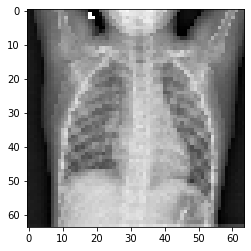

IM-0117-0001.jpeg
start 1


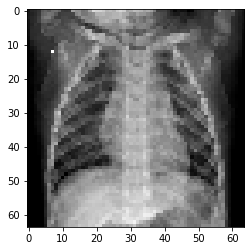

IM-0119-0001.jpeg
start 2


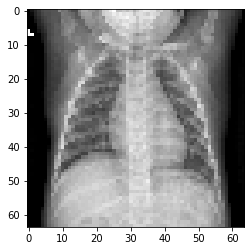

PNEUMONIA
person1000_bacteria_2931.jpeg
start 0


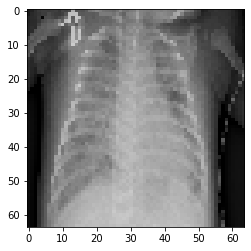

person1000_virus_1681.jpeg
start 1


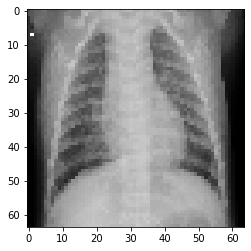

person1001_bacteria_2932.jpeg
start 2


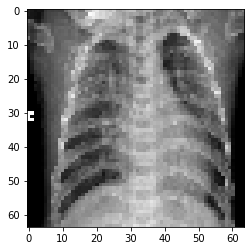

In [2]:
#U
path = '../data/train/'
for folder in os.listdir(path):
    print(folder)
    w = 0
    for filename in os.listdir(path+folder):
        if w < 3:
            print(filename)
            print('start', w)
            img = load_img(path+folder+'/'+filename, target_size=(64,64))
            plt.imshow(img)
            plt.show()
        w += 1

### Data Preprocessing
The images are resized to ensure input consistency and allow for efficient training performance.
Then, the resized images are arranged into train, test, and validation sets.

In the case of some models, data augmentation is also implemented, applying various transformations to the training set.


In [3]:
#data dirs
train_dir = '../data/train'
test_dir = '../data/test'
val_dir = '../data/val'

#image sizes aren't standard
#preprocess and save to new dir
dirs = [train_dir, test_dir, val_dir]
for data_dir in dirs:
    print('starting on dir', data_dir)
    for folder in os.listdir(data_dir):
        new_path = data_dir + '/' + folder
        for img_path in os.listdir(new_path):
            full_path = new_path + '/' + img_path
            print(full_path)
            preprocess_path = full_path[:8] + 'resized64/' + full_path[8:]
            
            img = Image.open(full_path)
            new_width  = 64
            new_height = 64
            img = img.resize((new_width, new_height), Image.ANTIALIAS)
            img.save(preprocess_path)
            print(preprocess_path)
            print('----------')

starting on dir ../data/train
../data/train/NORMAL/IM-0115-0001.jpeg
../data/resized64/train/NORMAL/IM-0115-0001.jpeg
----------
../data/train/NORMAL/IM-0117-0001.jpeg
../data/resized64/train/NORMAL/IM-0117-0001.jpeg
----------
../data/train/NORMAL/IM-0119-0001.jpeg
../data/resized64/train/NORMAL/IM-0119-0001.jpeg
----------
../data/train/NORMAL/IM-0122-0001.jpeg
../data/resized64/train/NORMAL/IM-0122-0001.jpeg
----------
../data/train/NORMAL/IM-0125-0001.jpeg
../data/resized64/train/NORMAL/IM-0125-0001.jpeg
----------
../data/train/NORMAL/IM-0127-0001.jpeg
../data/resized64/train/NORMAL/IM-0127-0001.jpeg
----------
../data/train/NORMAL/IM-0128-0001.jpeg
../data/resized64/train/NORMAL/IM-0128-0001.jpeg
----------
../data/train/NORMAL/IM-0129-0001.jpeg
../data/resized64/train/NORMAL/IM-0129-0001.jpeg
----------
../data/train/NORMAL/IM-0131-0001.jpeg
../data/resized64/train/NORMAL/IM-0131-0001.jpeg
----------
../data/train/NORMAL/IM-0133-0001.jpeg
../data/resized64/train/NORMAL/IM-0133-0

../data/resized64/train/NORMAL/IM-0249-0001.jpeg
----------
../data/train/NORMAL/IM-0250-0001.jpeg
../data/resized64/train/NORMAL/IM-0250-0001.jpeg
----------
../data/train/NORMAL/IM-0251-0001.jpeg
../data/resized64/train/NORMAL/IM-0251-0001.jpeg
----------
../data/train/NORMAL/IM-0253-0001.jpeg
../data/resized64/train/NORMAL/IM-0253-0001.jpeg
----------
../data/train/NORMAL/IM-0255-0001.jpeg
../data/resized64/train/NORMAL/IM-0255-0001.jpeg
----------
../data/train/NORMAL/IM-0256-0001.jpeg
../data/resized64/train/NORMAL/IM-0256-0001.jpeg
----------
../data/train/NORMAL/IM-0257-0001.jpeg
../data/resized64/train/NORMAL/IM-0257-0001.jpeg
----------
../data/train/NORMAL/IM-0261-0001.jpeg
../data/resized64/train/NORMAL/IM-0261-0001.jpeg
----------
../data/train/NORMAL/IM-0262-0001.jpeg
../data/resized64/train/NORMAL/IM-0262-0001.jpeg
----------
../data/train/NORMAL/IM-0264-0001.jpeg
../data/resized64/train/NORMAL/IM-0264-0001.jpeg
----------
../data/train/NORMAL/IM-0265-0001.jpeg
../data/re

../data/resized64/train/NORMAL/IM-0359-0001.jpeg
----------
../data/train/NORMAL/IM-0361-0001.jpeg
../data/resized64/train/NORMAL/IM-0361-0001.jpeg
----------
../data/train/NORMAL/IM-0362-0001.jpeg
../data/resized64/train/NORMAL/IM-0362-0001.jpeg
----------
../data/train/NORMAL/IM-0363-0001.jpeg
../data/resized64/train/NORMAL/IM-0363-0001.jpeg
----------
../data/train/NORMAL/IM-0364-0001.jpeg
../data/resized64/train/NORMAL/IM-0364-0001.jpeg
----------
../data/train/NORMAL/IM-0365-0001.jpeg
../data/resized64/train/NORMAL/IM-0365-0001.jpeg
----------
../data/train/NORMAL/IM-0367-0001.jpeg
../data/resized64/train/NORMAL/IM-0367-0001.jpeg
----------
../data/train/NORMAL/IM-0368-0001.jpeg
../data/resized64/train/NORMAL/IM-0368-0001.jpeg
----------
../data/train/NORMAL/IM-0369-0001.jpeg
../data/resized64/train/NORMAL/IM-0369-0001.jpeg
----------
../data/train/NORMAL/IM-0370-0001.jpeg
../data/resized64/train/NORMAL/IM-0370-0001.jpeg
----------
../data/train/NORMAL/IM-0371-0001.jpeg
../data/re

../data/resized64/train/NORMAL/IM-0455-0001.jpeg
----------
../data/train/NORMAL/IM-0456-0001.jpeg
../data/resized64/train/NORMAL/IM-0456-0001.jpeg
----------
../data/train/NORMAL/IM-0457-0001.jpeg
../data/resized64/train/NORMAL/IM-0457-0001.jpeg
----------
../data/train/NORMAL/IM-0458-0001.jpeg
../data/resized64/train/NORMAL/IM-0458-0001.jpeg
----------
../data/train/NORMAL/IM-0459-0001.jpeg
../data/resized64/train/NORMAL/IM-0459-0001.jpeg
----------
../data/train/NORMAL/IM-0460-0001.jpeg
../data/resized64/train/NORMAL/IM-0460-0001.jpeg
----------
../data/train/NORMAL/IM-0461-0001.jpeg
../data/resized64/train/NORMAL/IM-0461-0001.jpeg
----------
../data/train/NORMAL/IM-0463-0001.jpeg
../data/resized64/train/NORMAL/IM-0463-0001.jpeg
----------
../data/train/NORMAL/IM-0464-0001.jpeg
../data/resized64/train/NORMAL/IM-0464-0001.jpeg
----------
../data/train/NORMAL/IM-0465-0001.jpeg
../data/resized64/train/NORMAL/IM-0465-0001.jpeg
----------
../data/train/NORMAL/IM-0466-0001.jpeg
../data/re

../data/resized64/train/NORMAL/IM-0524-0001.jpeg
----------
../data/train/NORMAL/IM-0525-0001-0001.jpeg
../data/resized64/train/NORMAL/IM-0525-0001-0001.jpeg
----------
../data/train/NORMAL/IM-0525-0001-0002.jpeg
../data/resized64/train/NORMAL/IM-0525-0001-0002.jpeg
----------
../data/train/NORMAL/IM-0525-0001.jpeg
../data/resized64/train/NORMAL/IM-0525-0001.jpeg
----------
../data/train/NORMAL/IM-0526-0001.jpeg
../data/resized64/train/NORMAL/IM-0526-0001.jpeg
----------
../data/train/NORMAL/IM-0527-0001.jpeg
../data/resized64/train/NORMAL/IM-0527-0001.jpeg
----------
../data/train/NORMAL/IM-0528-0001.jpeg
../data/resized64/train/NORMAL/IM-0528-0001.jpeg
----------
../data/train/NORMAL/IM-0529-0001.jpeg
../data/resized64/train/NORMAL/IM-0529-0001.jpeg
----------
../data/train/NORMAL/IM-0530-0001.jpeg
../data/resized64/train/NORMAL/IM-0530-0001.jpeg
----------
../data/train/NORMAL/IM-0531-0001-0001.jpeg
../data/resized64/train/NORMAL/IM-0531-0001-0001.jpeg
----------
../data/train/NORMA

../data/resized64/train/NORMAL/IM-0605-0001.jpeg
----------
../data/train/NORMAL/IM-0606-0001.jpeg
../data/resized64/train/NORMAL/IM-0606-0001.jpeg
----------
../data/train/NORMAL/IM-0607-0001.jpeg
../data/resized64/train/NORMAL/IM-0607-0001.jpeg
----------
../data/train/NORMAL/IM-0608-0001-0001.jpeg
../data/resized64/train/NORMAL/IM-0608-0001-0001.jpeg
----------
../data/train/NORMAL/IM-0608-0001-0002.jpeg
../data/resized64/train/NORMAL/IM-0608-0001-0002.jpeg
----------
../data/train/NORMAL/IM-0608-0001.jpeg
../data/resized64/train/NORMAL/IM-0608-0001.jpeg
----------
../data/train/NORMAL/IM-0609-0001.jpeg
../data/resized64/train/NORMAL/IM-0609-0001.jpeg
----------
../data/train/NORMAL/IM-0612-0001-0001.jpeg
../data/resized64/train/NORMAL/IM-0612-0001-0001.jpeg
----------
../data/train/NORMAL/IM-0612-0001-0002.jpeg
../data/resized64/train/NORMAL/IM-0612-0001-0002.jpeg
----------
../data/train/NORMAL/IM-0612-0001.jpeg
../data/resized64/train/NORMAL/IM-0612-0001.jpeg
----------
../data/t

../data/resized64/train/NORMAL/IM-0665-0001.jpeg
----------
../data/train/NORMAL/IM-0666-0001-0001.jpeg
../data/resized64/train/NORMAL/IM-0666-0001-0001.jpeg
----------
../data/train/NORMAL/IM-0666-0001-0002.jpeg
../data/resized64/train/NORMAL/IM-0666-0001-0002.jpeg
----------
../data/train/NORMAL/IM-0666-0001.jpeg
../data/resized64/train/NORMAL/IM-0666-0001.jpeg
----------
../data/train/NORMAL/IM-0667-0001.jpeg
../data/resized64/train/NORMAL/IM-0667-0001.jpeg
----------
../data/train/NORMAL/IM-0668-0001.jpeg
../data/resized64/train/NORMAL/IM-0668-0001.jpeg
----------
../data/train/NORMAL/IM-0669-0001.jpeg
../data/resized64/train/NORMAL/IM-0669-0001.jpeg
----------
../data/train/NORMAL/IM-0670-0001.jpeg
../data/resized64/train/NORMAL/IM-0670-0001.jpeg
----------
../data/train/NORMAL/IM-0671-0001.jpeg
../data/resized64/train/NORMAL/IM-0671-0001.jpeg
----------
../data/train/NORMAL/IM-0672-0001.jpeg
../data/resized64/train/NORMAL/IM-0672-0001.jpeg
----------
../data/train/NORMAL/IM-0673-

../data/resized64/train/NORMAL/IM-0766-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0383-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0383-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0384-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0384-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0385-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0385-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0386-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0386-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0388-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0388-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0389-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0389-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0390-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0390-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0391-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0391-0001.jpeg
----------
../data/train/NORMAL

../data/resized64/train/NORMAL/NORMAL2-IM-0479-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0480-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0480-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0481-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0481-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0482-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0482-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0485-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0485-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0486-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0486-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0487-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0487-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0488-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0488-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0489-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0489-0001.jpeg
----------
../data/trai

../data/resized64/train/NORMAL/NORMAL2-IM-0573-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0575-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0575-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0576-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0576-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0577-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0577-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0578-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0578-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0579-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0579-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0580-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0580-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0582-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0582-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0583-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0583-0001.jpeg
----------
../data/trai

../data/resized64/train/NORMAL/NORMAL2-IM-0680-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0682-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0682-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0683-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0683-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0684-0001-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0684-0001-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0686-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0686-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0687-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0687-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0689-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0689-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0690-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0690-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0692-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0692-0001.jpeg
----------
..

../data/resized64/train/NORMAL/NORMAL2-IM-0832-0001-0002.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0832-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0832-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0833-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0833-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0834-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0834-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0836-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0836-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0837-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0837-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0838-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0838-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0839-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0839-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0840-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0840-0001.jpeg
----------
../data

../data/resized64/train/NORMAL/NORMAL2-IM-0913-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0914-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0914-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0915-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0915-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0917-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0917-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0918-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0918-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0919-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0919-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0922-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0922-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0923-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0923-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-0924-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-0924-0001.jpeg
----------
../data/trai

../data/resized64/train/NORMAL/NORMAL2-IM-1006-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1008-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1008-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1010-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1010-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1011-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1011-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1014-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1014-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1015-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1015-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1016-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1016-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1017-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1017-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1018-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1018-0001.jpeg
----------
../data/trai

../data/resized64/train/NORMAL/NORMAL2-IM-1110-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1111-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1111-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1112-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1112-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1113-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1113-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1114-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1114-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1116-0001-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1116-0001-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1116-0001-0002.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1116-0001-0002.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1116-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1116-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1117-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1117-0001.jpeg
---

../data/resized64/train/NORMAL/NORMAL2-IM-1189-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1190-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1190-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1191-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1191-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1192-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1192-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1194-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1194-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1196-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1196-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1197-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1197-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1198-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1198-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1200-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1200-0001.jpeg
----------
../data/trai

../data/resized64/train/NORMAL/NORMAL2-IM-1280-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1281-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1281-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1282-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1282-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1285-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1285-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1286-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1286-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1287-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1287-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1288-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1288-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1289-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1289-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1290-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1290-0001.jpeg
----------
../data/trai

../data/resized64/train/NORMAL/NORMAL2-IM-1400-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1401-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1401-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1406-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1406-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1412-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1412-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1419-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1419-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1422-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1422-0001.jpeg
----------
../data/train/NORMAL/NORMAL2-IM-1423-0001.jpeg
../data/resized64/train/NORMAL/NORMAL2-IM-1423-0001.jpeg
----------
../data/train/PNEUMONIA/person1000_bacteria_2931.jpeg
../data/resized64/train/PNEUMONIA/person1000_bacteria_2931.jpeg
----------
../data/train/PNEUMONIA/person1000_virus_1681.jpeg
../data/resized64/train/PNEUMONIA/person1000_virus_1681.jpeg
-

../data/resized64/train/PNEUMONIA/person1042_virus_1737.jpeg
----------
../data/train/PNEUMONIA/person1043_bacteria_2977.jpeg
../data/resized64/train/PNEUMONIA/person1043_bacteria_2977.jpeg
----------
../data/train/PNEUMONIA/person1043_virus_1738.jpeg
../data/resized64/train/PNEUMONIA/person1043_virus_1738.jpeg
----------
../data/train/PNEUMONIA/person1044_bacteria_2978.jpeg
../data/resized64/train/PNEUMONIA/person1044_bacteria_2978.jpeg
----------
../data/train/PNEUMONIA/person1044_virus_1740.jpeg
../data/resized64/train/PNEUMONIA/person1044_virus_1740.jpeg
----------
../data/train/PNEUMONIA/person1045_bacteria_2979.jpeg
../data/resized64/train/PNEUMONIA/person1045_bacteria_2979.jpeg
----------
../data/train/PNEUMONIA/person1045_virus_1741.jpeg
../data/resized64/train/PNEUMONIA/person1045_virus_1741.jpeg
----------
../data/train/PNEUMONIA/person1046_bacteria_2980.jpeg
../data/resized64/train/PNEUMONIA/person1046_bacteria_2980.jpeg
----------
../data/train/PNEUMONIA/person1046_virus_17

../data/resized64/train/PNEUMONIA/person1082_bacteria_3022.jpeg
----------
../data/train/PNEUMONIA/person1082_virus_1794.jpeg
../data/resized64/train/PNEUMONIA/person1082_virus_1794.jpeg
----------
../data/train/PNEUMONIA/person1083_bacteria_3023.jpeg
../data/resized64/train/PNEUMONIA/person1083_bacteria_3023.jpeg
----------
../data/train/PNEUMONIA/person1083_virus_1795.jpeg
../data/resized64/train/PNEUMONIA/person1083_virus_1795.jpeg
----------
../data/train/PNEUMONIA/person1084_bacteria_3024.jpeg
../data/resized64/train/PNEUMONIA/person1084_bacteria_3024.jpeg
----------
../data/train/PNEUMONIA/person1084_virus_1796.jpeg
../data/resized64/train/PNEUMONIA/person1084_virus_1796.jpeg
----------
../data/train/PNEUMONIA/person1085_bacteria_3025.jpeg
../data/resized64/train/PNEUMONIA/person1085_bacteria_3025.jpeg
----------
../data/train/PNEUMONIA/person1085_virus_1797.jpeg
../data/resized64/train/PNEUMONIA/person1085_virus_1797.jpeg
----------
../data/train/PNEUMONIA/person1086_bacteria_30

../data/resized64/train/PNEUMONIA/person1127_bacteria_3068.jpeg
----------
../data/train/PNEUMONIA/person1127_virus_1854.jpeg
../data/resized64/train/PNEUMONIA/person1127_virus_1854.jpeg
----------
../data/train/PNEUMONIA/person1128_bacteria_3069.jpeg
../data/resized64/train/PNEUMONIA/person1128_bacteria_3069.jpeg
----------
../data/train/PNEUMONIA/person1129_bacteria_3070.jpeg
../data/resized64/train/PNEUMONIA/person1129_bacteria_3070.jpeg
----------
../data/train/PNEUMONIA/person1129_virus_1857.jpeg
../data/resized64/train/PNEUMONIA/person1129_virus_1857.jpeg
----------
../data/train/PNEUMONIA/person112_virus_213.jpeg
../data/resized64/train/PNEUMONIA/person112_virus_213.jpeg
----------
../data/train/PNEUMONIA/person1130_bacteria_3072.jpeg
../data/resized64/train/PNEUMONIA/person1130_bacteria_3072.jpeg
----------
../data/train/PNEUMONIA/person1130_virus_1860.jpeg
../data/resized64/train/PNEUMONIA/person1130_virus_1860.jpeg
----------
../data/train/PNEUMONIA/person1131_bacteria_3073.j

../data/resized64/train/PNEUMONIA/person1164_virus_1957.jpeg
----------
../data/train/PNEUMONIA/person1164_virus_1958.jpeg
../data/resized64/train/PNEUMONIA/person1164_virus_1958.jpeg
----------
../data/train/PNEUMONIA/person1165_bacteria_3111.jpeg
../data/resized64/train/PNEUMONIA/person1165_bacteria_3111.jpeg
----------
../data/train/PNEUMONIA/person1165_virus_1959.jpeg
../data/resized64/train/PNEUMONIA/person1165_virus_1959.jpeg
----------
../data/train/PNEUMONIA/person1167_bacteria_3113.jpeg
../data/resized64/train/PNEUMONIA/person1167_bacteria_3113.jpeg
----------
../data/train/PNEUMONIA/person1168_bacteria_3114.jpeg
../data/resized64/train/PNEUMONIA/person1168_bacteria_3114.jpeg
----------
../data/train/PNEUMONIA/person1168_bacteria_3115.jpeg
../data/resized64/train/PNEUMONIA/person1168_bacteria_3115.jpeg
----------
../data/train/PNEUMONIA/person1168_virus_1965.jpeg
../data/resized64/train/PNEUMONIA/person1168_virus_1965.jpeg
----------
../data/train/PNEUMONIA/person1168_virus_19

../data/resized64/train/PNEUMONIA/person1200_virus_2042.jpeg
----------
../data/train/PNEUMONIA/person1201_bacteria_3151.jpeg
../data/resized64/train/PNEUMONIA/person1201_bacteria_3151.jpeg
----------
../data/train/PNEUMONIA/person1202_bacteria_3152.jpeg
../data/resized64/train/PNEUMONIA/person1202_bacteria_3152.jpeg
----------
../data/train/PNEUMONIA/person1202_bacteria_3153.jpeg
../data/resized64/train/PNEUMONIA/person1202_bacteria_3153.jpeg
----------
../data/train/PNEUMONIA/person1202_virus_2045.jpeg
../data/resized64/train/PNEUMONIA/person1202_virus_2045.jpeg
----------
../data/train/PNEUMONIA/person1203_bacteria_3154.jpeg
../data/resized64/train/PNEUMONIA/person1203_bacteria_3154.jpeg
----------
../data/train/PNEUMONIA/person1203_bacteria_3155.jpeg
../data/resized64/train/PNEUMONIA/person1203_bacteria_3155.jpeg
----------
../data/train/PNEUMONIA/person1204_bacteria_3156.jpeg
../data/resized64/train/PNEUMONIA/person1204_bacteria_3156.jpeg
----------
../data/train/PNEUMONIA/person1

../data/resized64/train/PNEUMONIA/person1249_virus_2118.jpeg
----------
../data/train/PNEUMONIA/person124_virus_231.jpeg
../data/resized64/train/PNEUMONIA/person124_virus_231.jpeg
----------
../data/train/PNEUMONIA/person124_virus_233.jpeg
../data/resized64/train/PNEUMONIA/person124_virus_233.jpeg
----------
../data/train/PNEUMONIA/person124_virus_234.jpeg
../data/resized64/train/PNEUMONIA/person124_virus_234.jpeg
----------
../data/train/PNEUMONIA/person124_virus_236.jpeg
../data/resized64/train/PNEUMONIA/person124_virus_236.jpeg
----------
../data/train/PNEUMONIA/person124_virus_237.jpeg
../data/resized64/train/PNEUMONIA/person124_virus_237.jpeg
----------
../data/train/PNEUMONIA/person124_virus_238.jpeg
../data/resized64/train/PNEUMONIA/person124_virus_238.jpeg
----------
../data/train/PNEUMONIA/person124_virus_239.jpeg
../data/resized64/train/PNEUMONIA/person124_virus_239.jpeg
----------
../data/train/PNEUMONIA/person124_virus_240.jpeg
../data/resized64/train/PNEUMONIA/person124_vi

../data/resized64/train/PNEUMONIA/person1283_virus_2206.jpeg
----------
../data/train/PNEUMONIA/person1284_bacteria_3247.jpeg
../data/resized64/train/PNEUMONIA/person1284_bacteria_3247.jpeg
----------
../data/train/PNEUMONIA/person1284_virus_2207.jpeg
../data/resized64/train/PNEUMONIA/person1284_virus_2207.jpeg
----------
../data/train/PNEUMONIA/person1285_virus_2208.jpeg
../data/resized64/train/PNEUMONIA/person1285_virus_2208.jpeg
----------
../data/train/PNEUMONIA/person1286_bacteria_3249.jpeg
../data/resized64/train/PNEUMONIA/person1286_bacteria_3249.jpeg
----------
../data/train/PNEUMONIA/person1286_virus_2209.jpeg
../data/resized64/train/PNEUMONIA/person1286_virus_2209.jpeg
----------
../data/train/PNEUMONIA/person1287_bacteria_3250.jpeg
../data/resized64/train/PNEUMONIA/person1287_bacteria_3250.jpeg
----------
../data/train/PNEUMONIA/person1287_virus_2210.jpeg
../data/resized64/train/PNEUMONIA/person1287_virus_2210.jpeg
----------
../data/train/PNEUMONIA/person1288_bacteria_3251.

../data/resized64/train/PNEUMONIA/person1312_bacteria_3317.jpeg
----------
../data/train/PNEUMONIA/person1312_bacteria_3318.jpeg
../data/resized64/train/PNEUMONIA/person1312_bacteria_3318.jpeg
----------
../data/train/PNEUMONIA/person1312_bacteria_3319.jpeg
../data/resized64/train/PNEUMONIA/person1312_bacteria_3319.jpeg
----------
../data/train/PNEUMONIA/person1312_virus_2261.jpeg
../data/resized64/train/PNEUMONIA/person1312_virus_2261.jpeg
----------
../data/train/PNEUMONIA/person1313_bacteria_3320.jpeg
../data/resized64/train/PNEUMONIA/person1313_bacteria_3320.jpeg
----------
../data/train/PNEUMONIA/person1313_virus_2264.jpeg
../data/resized64/train/PNEUMONIA/person1313_virus_2264.jpeg
----------
../data/train/PNEUMONIA/person1314_virus_2266.jpeg
../data/resized64/train/PNEUMONIA/person1314_virus_2266.jpeg
----------
../data/train/PNEUMONIA/person1314_virus_2268.jpeg
../data/resized64/train/PNEUMONIA/person1314_virus_2268.jpeg
----------
../data/train/PNEUMONIA/person1314_virus_2269.

../data/resized64/train/PNEUMONIA/person1341_virus_2313.jpeg
----------
../data/train/PNEUMONIA/person1342_bacteria_3407.jpeg
../data/resized64/train/PNEUMONIA/person1342_bacteria_3407.jpeg
----------
../data/train/PNEUMONIA/person1342_virus_2315.jpeg
../data/resized64/train/PNEUMONIA/person1342_virus_2315.jpeg
----------
../data/train/PNEUMONIA/person1343_bacteria_3409.jpeg
../data/resized64/train/PNEUMONIA/person1343_bacteria_3409.jpeg
----------
../data/train/PNEUMONIA/person1343_bacteria_3411.jpeg
../data/resized64/train/PNEUMONIA/person1343_bacteria_3411.jpeg
----------
../data/train/PNEUMONIA/person1343_bacteria_3413.jpeg
../data/resized64/train/PNEUMONIA/person1343_bacteria_3413.jpeg
----------
../data/train/PNEUMONIA/person1343_bacteria_3414.jpeg
../data/resized64/train/PNEUMONIA/person1343_bacteria_3414.jpeg
----------
../data/train/PNEUMONIA/person1343_bacteria_3415.jpeg
../data/resized64/train/PNEUMONIA/person1343_bacteria_3415.jpeg
----------
../data/train/PNEUMONIA/person1

../data/resized64/train/PNEUMONIA/person1368_virus_2352.jpeg
----------
../data/train/PNEUMONIA/person1368_virus_2353.jpeg
../data/resized64/train/PNEUMONIA/person1368_virus_2353.jpeg
----------
../data/train/PNEUMONIA/person1368_virus_2354.jpeg
../data/resized64/train/PNEUMONIA/person1368_virus_2354.jpeg
----------
../data/train/PNEUMONIA/person1369_virus_2355.jpeg
../data/resized64/train/PNEUMONIA/person1369_virus_2355.jpeg
----------
../data/train/PNEUMONIA/person1369_virus_2356.jpeg
../data/resized64/train/PNEUMONIA/person1369_virus_2356.jpeg
----------
../data/train/PNEUMONIA/person1371_virus_2361.jpeg
../data/resized64/train/PNEUMONIA/person1371_virus_2361.jpeg
----------
../data/train/PNEUMONIA/person1371_virus_2362.jpeg
../data/resized64/train/PNEUMONIA/person1371_virus_2362.jpeg
----------
../data/train/PNEUMONIA/person1372_bacteria_3498.jpeg
../data/resized64/train/PNEUMONIA/person1372_bacteria_3498.jpeg
----------
../data/train/PNEUMONIA/person1372_bacteria_3499.jpeg
../data

../data/resized64/train/PNEUMONIA/person1405_bacteria_3566.jpeg
----------
../data/train/PNEUMONIA/person1405_bacteria_3567.jpeg
../data/resized64/train/PNEUMONIA/person1405_bacteria_3567.jpeg
----------
../data/train/PNEUMONIA/person1405_bacteria_3571.jpeg
../data/resized64/train/PNEUMONIA/person1405_bacteria_3571.jpeg
----------
../data/train/PNEUMONIA/person1405_bacteria_3573.jpeg
../data/resized64/train/PNEUMONIA/person1405_bacteria_3573.jpeg
----------
../data/train/PNEUMONIA/person1405_virus_2408.jpeg
../data/resized64/train/PNEUMONIA/person1405_virus_2408.jpeg
----------
../data/train/PNEUMONIA/person1406_bacteria_3574.jpeg
../data/resized64/train/PNEUMONIA/person1406_bacteria_3574.jpeg
----------
../data/train/PNEUMONIA/person1406_bacteria_3575.jpeg
../data/resized64/train/PNEUMONIA/person1406_bacteria_3575.jpeg
----------
../data/train/PNEUMONIA/person1406_virus_2409.jpeg
../data/resized64/train/PNEUMONIA/person1406_virus_2409.jpeg
----------
../data/train/PNEUMONIA/person1407

../data/resized64/train/PNEUMONIA/person1430_bacteria_3697.jpeg
----------
../data/train/PNEUMONIA/person1430_virus_2444.jpeg
../data/resized64/train/PNEUMONIA/person1430_virus_2444.jpeg
----------
../data/train/PNEUMONIA/person1431_bacteria_3698.jpeg
../data/resized64/train/PNEUMONIA/person1431_bacteria_3698.jpeg
----------
../data/train/PNEUMONIA/person1432_bacteria_3699.jpeg
../data/resized64/train/PNEUMONIA/person1432_bacteria_3699.jpeg
----------
../data/train/PNEUMONIA/person1433_bacteria_3701.jpeg
../data/resized64/train/PNEUMONIA/person1433_bacteria_3701.jpeg
----------
../data/train/PNEUMONIA/person1433_bacteria_3704.jpeg
../data/resized64/train/PNEUMONIA/person1433_bacteria_3704.jpeg
----------
../data/train/PNEUMONIA/person1433_bacteria_3705.jpeg
../data/resized64/train/PNEUMONIA/person1433_bacteria_3705.jpeg
----------
../data/train/PNEUMONIA/person1433_virus_2447.jpeg
../data/resized64/train/PNEUMONIA/person1433_virus_2447.jpeg
----------
../data/train/PNEUMONIA/person1436

../data/resized64/train/PNEUMONIA/person1460_bacteria_3805.jpeg
----------
../data/train/PNEUMONIA/person1460_virus_2507.jpeg
../data/resized64/train/PNEUMONIA/person1460_virus_2507.jpeg
----------
../data/train/PNEUMONIA/person1460_virus_2509.jpeg
../data/resized64/train/PNEUMONIA/person1460_virus_2509.jpeg
----------
../data/train/PNEUMONIA/person1461_virus_2510.jpeg
../data/resized64/train/PNEUMONIA/person1461_virus_2510.jpeg
----------
../data/train/PNEUMONIA/person1462_virus_2512.jpeg
../data/resized64/train/PNEUMONIA/person1462_virus_2512.jpeg
----------
../data/train/PNEUMONIA/person1463_bacteria_3808.jpeg
../data/resized64/train/PNEUMONIA/person1463_bacteria_3808.jpeg
----------
../data/train/PNEUMONIA/person1463_bacteria_3809.jpeg
../data/resized64/train/PNEUMONIA/person1463_bacteria_3809.jpeg
----------
../data/train/PNEUMONIA/person1463_bacteria_3811.jpeg
../data/resized64/train/PNEUMONIA/person1463_bacteria_3811.jpeg
----------
../data/train/PNEUMONIA/person1463_virus_2516.

../data/resized64/train/PNEUMONIA/person1488_virus_2593.jpeg
----------
../data/train/PNEUMONIA/person1489_bacteria_3889.jpeg
../data/resized64/train/PNEUMONIA/person1489_bacteria_3889.jpeg
----------
../data/train/PNEUMONIA/person1489_virus_2594.jpeg
../data/resized64/train/PNEUMONIA/person1489_virus_2594.jpeg
----------
../data/train/PNEUMONIA/person148_virus_298.jpeg
../data/resized64/train/PNEUMONIA/person148_virus_298.jpeg
----------
../data/train/PNEUMONIA/person1490_bacteria_3891.jpeg
../data/resized64/train/PNEUMONIA/person1490_bacteria_3891.jpeg
----------
../data/train/PNEUMONIA/person1490_virus_2596.jpeg
../data/resized64/train/PNEUMONIA/person1490_virus_2596.jpeg
----------
../data/train/PNEUMONIA/person1491_bacteria_3892.jpeg
../data/resized64/train/PNEUMONIA/person1491_bacteria_3892.jpeg
----------
../data/train/PNEUMONIA/person1491_bacteria_3893.jpeg
../data/resized64/train/PNEUMONIA/person1491_bacteria_3893.jpeg
----------
../data/train/PNEUMONIA/person1491_virus_2597.j

../data/resized64/train/PNEUMONIA/person1516_virus_2643.jpeg
----------
../data/train/PNEUMONIA/person1517_bacteria_3968.jpeg
../data/resized64/train/PNEUMONIA/person1517_bacteria_3968.jpeg
----------
../data/train/PNEUMONIA/person1517_virus_2644.jpeg
../data/resized64/train/PNEUMONIA/person1517_virus_2644.jpeg
----------
../data/train/PNEUMONIA/person1518_bacteria_3969.jpeg
../data/resized64/train/PNEUMONIA/person1518_bacteria_3969.jpeg
----------
../data/train/PNEUMONIA/person1518_virus_2645.jpeg
../data/resized64/train/PNEUMONIA/person1518_virus_2645.jpeg
----------
../data/train/PNEUMONIA/person1519_bacteria_3970.jpeg
../data/resized64/train/PNEUMONIA/person1519_bacteria_3970.jpeg
----------
../data/train/PNEUMONIA/person1519_virus_2646.jpeg
../data/resized64/train/PNEUMONIA/person1519_virus_2646.jpeg
----------
../data/train/PNEUMONIA/person151_virus_301.jpeg
../data/resized64/train/PNEUMONIA/person151_virus_301.jpeg
----------
../data/train/PNEUMONIA/person151_virus_302.jpeg
../d

../data/resized64/train/PNEUMONIA/person154_virus_305.jpeg
----------
../data/train/PNEUMONIA/person154_virus_306.jpeg
../data/resized64/train/PNEUMONIA/person154_virus_306.jpeg
----------
../data/train/PNEUMONIA/person1550_bacteria_4051.jpeg
../data/resized64/train/PNEUMONIA/person1550_bacteria_4051.jpeg
----------
../data/train/PNEUMONIA/person1550_virus_2691.jpeg
../data/resized64/train/PNEUMONIA/person1550_virus_2691.jpeg
----------
../data/train/PNEUMONIA/person1551_bacteria_4053.jpeg
../data/resized64/train/PNEUMONIA/person1551_bacteria_4053.jpeg
----------
../data/train/PNEUMONIA/person1551_bacteria_4054.jpeg
../data/resized64/train/PNEUMONIA/person1551_bacteria_4054.jpeg
----------
../data/train/PNEUMONIA/person1551_virus_2692.jpeg
../data/resized64/train/PNEUMONIA/person1551_virus_2692.jpeg
----------
../data/train/PNEUMONIA/person1552_bacteria_4055.jpeg
../data/resized64/train/PNEUMONIA/person1552_bacteria_4055.jpeg
----------
../data/train/PNEUMONIA/person1554_bacteria_4057.

../data/resized64/train/PNEUMONIA/person1589_bacteria_4172.jpeg
----------
../data/train/PNEUMONIA/person1589_virus_2763.jpeg
../data/resized64/train/PNEUMONIA/person1589_virus_2763.jpeg
----------
../data/train/PNEUMONIA/person158_virus_312.jpeg
../data/resized64/train/PNEUMONIA/person158_virus_312.jpeg
----------
../data/train/PNEUMONIA/person1590_bacteria_4174.jpeg
../data/resized64/train/PNEUMONIA/person1590_bacteria_4174.jpeg
----------
../data/train/PNEUMONIA/person1590_bacteria_4175.jpeg
../data/resized64/train/PNEUMONIA/person1590_bacteria_4175.jpeg
----------
../data/train/PNEUMONIA/person1590_bacteria_4176.jpeg
../data/resized64/train/PNEUMONIA/person1590_bacteria_4176.jpeg
----------
../data/train/PNEUMONIA/person1590_virus_2764.jpeg
../data/resized64/train/PNEUMONIA/person1590_virus_2764.jpeg
----------
../data/train/PNEUMONIA/person1591_bacteria_4177.jpeg
../data/resized64/train/PNEUMONIA/person1591_bacteria_4177.jpeg
----------
../data/train/PNEUMONIA/person1591_virus_276

../data/resized64/train/PNEUMONIA/person1629_bacteria_4299.jpeg
----------
../data/train/PNEUMONIA/person162_virus_319.jpeg
../data/resized64/train/PNEUMONIA/person162_virus_319.jpeg
----------
../data/train/PNEUMONIA/person162_virus_320.jpeg
../data/resized64/train/PNEUMONIA/person162_virus_320.jpeg
----------
../data/train/PNEUMONIA/person162_virus_321.jpeg
../data/resized64/train/PNEUMONIA/person162_virus_321.jpeg
----------
../data/train/PNEUMONIA/person162_virus_322.jpeg
../data/resized64/train/PNEUMONIA/person162_virus_322.jpeg
----------
../data/train/PNEUMONIA/person1630_bacteria_4303.jpeg
../data/resized64/train/PNEUMONIA/person1630_bacteria_4303.jpeg
----------
../data/train/PNEUMONIA/person1630_bacteria_4304.jpeg
../data/resized64/train/PNEUMONIA/person1630_bacteria_4304.jpeg
----------
../data/train/PNEUMONIA/person1634_bacteria_4326.jpeg
../data/resized64/train/PNEUMONIA/person1634_bacteria_4326.jpeg
----------
../data/train/PNEUMONIA/person1634_bacteria_4331.jpeg
../data/

../data/resized64/train/PNEUMONIA/person1684_bacteria_4462.jpeg
----------
../data/train/PNEUMONIA/person1684_bacteria_4463.jpeg
../data/resized64/train/PNEUMONIA/person1684_bacteria_4463.jpeg
----------
../data/train/PNEUMONIA/person1685_bacteria_4465.jpeg
../data/resized64/train/PNEUMONIA/person1685_bacteria_4465.jpeg
----------
../data/train/PNEUMONIA/person1686_bacteria_4466.jpeg
../data/resized64/train/PNEUMONIA/person1686_bacteria_4466.jpeg
----------
../data/train/PNEUMONIA/person1687_bacteria_4468.jpeg
../data/resized64/train/PNEUMONIA/person1687_bacteria_4468.jpeg
----------
../data/train/PNEUMONIA/person1689_bacteria_4472.jpeg
../data/resized64/train/PNEUMONIA/person1689_bacteria_4472.jpeg
----------
../data/train/PNEUMONIA/person1689_bacteria_4473.jpeg
../data/resized64/train/PNEUMONIA/person1689_bacteria_4473.jpeg
----------
../data/train/PNEUMONIA/person1689_bacteria_4474.jpeg
../data/resized64/train/PNEUMONIA/person1689_bacteria_4474.jpeg
----------
../data/train/PNEUMONI

../data/resized64/train/PNEUMONIA/person1748_bacteria_4588.jpeg
----------
../data/train/PNEUMONIA/person1749_bacteria_4590.jpeg
../data/resized64/train/PNEUMONIA/person1749_bacteria_4590.jpeg
----------
../data/train/PNEUMONIA/person1751_bacteria_4592.jpeg
../data/resized64/train/PNEUMONIA/person1751_bacteria_4592.jpeg
----------
../data/train/PNEUMONIA/person1753_bacteria_4594.jpeg
../data/resized64/train/PNEUMONIA/person1753_bacteria_4594.jpeg
----------
../data/train/PNEUMONIA/person1756_bacteria_4598.jpeg
../data/resized64/train/PNEUMONIA/person1756_bacteria_4598.jpeg
----------
../data/train/PNEUMONIA/person1757_bacteria_4599.jpeg
../data/resized64/train/PNEUMONIA/person1757_bacteria_4599.jpeg
----------
../data/train/PNEUMONIA/person1758_bacteria_4600.jpeg
../data/resized64/train/PNEUMONIA/person1758_bacteria_4600.jpeg
----------
../data/train/PNEUMONIA/person1760_bacteria_4602.jpeg
../data/resized64/train/PNEUMONIA/person1760_bacteria_4602.jpeg
----------
../data/train/PNEUMONI

----------
../data/train/PNEUMONIA/person1910_bacteria_4814.jpeg
../data/resized64/train/PNEUMONIA/person1910_bacteria_4814.jpeg
----------
../data/train/PNEUMONIA/person1911_bacteria_4815.jpeg
../data/resized64/train/PNEUMONIA/person1911_bacteria_4815.jpeg
----------
../data/train/PNEUMONIA/person1912_bacteria_4816.jpeg
../data/resized64/train/PNEUMONIA/person1912_bacteria_4816.jpeg
----------
../data/train/PNEUMONIA/person1912_bacteria_4817.jpeg
../data/resized64/train/PNEUMONIA/person1912_bacteria_4817.jpeg
----------
../data/train/PNEUMONIA/person1916_bacteria_4821.jpeg
../data/resized64/train/PNEUMONIA/person1916_bacteria_4821.jpeg
----------
../data/train/PNEUMONIA/person1917_bacteria_4823.jpeg
../data/resized64/train/PNEUMONIA/person1917_bacteria_4823.jpeg
----------
../data/train/PNEUMONIA/person1918_bacteria_4825.jpeg
../data/resized64/train/PNEUMONIA/person1918_bacteria_4825.jpeg
----------
../data/train/PNEUMONIA/person1921_bacteria_4828.jpeg
../data/resized64/train/PNEUMONI

../data/resized64/train/PNEUMONIA/person24_bacteria_111.jpeg
----------
../data/train/PNEUMONIA/person24_bacteria_112.jpeg
../data/resized64/train/PNEUMONIA/person24_bacteria_112.jpeg
----------
../data/train/PNEUMONIA/person253_bacteria_1152.jpeg
../data/resized64/train/PNEUMONIA/person253_bacteria_1152.jpeg
----------
../data/train/PNEUMONIA/person253_bacteria_1153.jpeg
../data/resized64/train/PNEUMONIA/person253_bacteria_1153.jpeg
----------
../data/train/PNEUMONIA/person253_bacteria_1154.jpeg
../data/resized64/train/PNEUMONIA/person253_bacteria_1154.jpeg
----------
../data/train/PNEUMONIA/person253_bacteria_1155.jpeg
../data/resized64/train/PNEUMONIA/person253_bacteria_1155.jpeg
----------
../data/train/PNEUMONIA/person253_bacteria_1156.jpeg
../data/resized64/train/PNEUMONIA/person253_bacteria_1156.jpeg
----------
../data/train/PNEUMONIA/person253_bacteria_1157.jpeg
../data/resized64/train/PNEUMONIA/person253_bacteria_1157.jpeg
----------
../data/train/PNEUMONIA/person255_bacteria_

../data/resized64/train/PNEUMONIA/person265_bacteria_1236.jpeg
----------
../data/train/PNEUMONIA/person265_virus_548.jpeg
../data/resized64/train/PNEUMONIA/person265_virus_548.jpeg
----------
../data/train/PNEUMONIA/person266_bacteria_1237.jpeg
../data/resized64/train/PNEUMONIA/person266_bacteria_1237.jpeg
----------
../data/train/PNEUMONIA/person266_bacteria_1238.jpeg
../data/resized64/train/PNEUMONIA/person266_bacteria_1238.jpeg
----------
../data/train/PNEUMONIA/person266_bacteria_1239.jpeg
../data/resized64/train/PNEUMONIA/person266_bacteria_1239.jpeg
----------
../data/train/PNEUMONIA/person266_bacteria_1240.jpeg
../data/resized64/train/PNEUMONIA/person266_bacteria_1240.jpeg
----------
../data/train/PNEUMONIA/person266_bacteria_1241.jpeg
../data/resized64/train/PNEUMONIA/person266_bacteria_1241.jpeg
----------
../data/train/PNEUMONIA/person266_bacteria_1242.jpeg
../data/resized64/train/PNEUMONIA/person266_bacteria_1242.jpeg
----------
../data/train/PNEUMONIA/person266_bacteria_12

../data/resized64/train/PNEUMONIA/person279_virus_576.jpeg
----------
../data/train/PNEUMONIA/person27_bacteria_135.jpeg
../data/resized64/train/PNEUMONIA/person27_bacteria_135.jpeg
----------
../data/train/PNEUMONIA/person27_bacteria_136.jpeg
../data/resized64/train/PNEUMONIA/person27_bacteria_136.jpeg
----------
../data/train/PNEUMONIA/person27_bacteria_137.jpeg
../data/resized64/train/PNEUMONIA/person27_bacteria_137.jpeg
----------
../data/train/PNEUMONIA/person27_bacteria_138.jpeg
../data/resized64/train/PNEUMONIA/person27_bacteria_138.jpeg
----------
../data/train/PNEUMONIA/person280_bacteria_1318.jpeg
../data/resized64/train/PNEUMONIA/person280_bacteria_1318.jpeg
----------
../data/train/PNEUMONIA/person280_bacteria_1320.jpeg
../data/resized64/train/PNEUMONIA/person280_bacteria_1320.jpeg
----------
../data/train/PNEUMONIA/person280_bacteria_1321.jpeg
../data/resized64/train/PNEUMONIA/person280_bacteria_1321.jpeg
----------
../data/train/PNEUMONIA/person280_bacteria_1322.jpeg
../d

../data/resized64/train/PNEUMONIA/person296_bacteria_1396.jpeg
----------
../data/train/PNEUMONIA/person296_bacteria_1397.jpeg
../data/resized64/train/PNEUMONIA/person296_bacteria_1397.jpeg
----------
../data/train/PNEUMONIA/person296_virus_613.jpeg
../data/resized64/train/PNEUMONIA/person296_virus_613.jpeg
----------
../data/train/PNEUMONIA/person297_bacteria_1400.jpeg
../data/resized64/train/PNEUMONIA/person297_bacteria_1400.jpeg
----------
../data/train/PNEUMONIA/person297_bacteria_1404.jpeg
../data/resized64/train/PNEUMONIA/person297_bacteria_1404.jpeg
----------
../data/train/PNEUMONIA/person297_virus_614.jpeg
../data/resized64/train/PNEUMONIA/person297_virus_614.jpeg
----------
../data/train/PNEUMONIA/person298_bacteria_1408.jpeg
../data/resized64/train/PNEUMONIA/person298_bacteria_1408.jpeg
----------
../data/train/PNEUMONIA/person298_bacteria_1409.jpeg
../data/resized64/train/PNEUMONIA/person298_bacteria_1409.jpeg
----------
../data/train/PNEUMONIA/person298_bacteria_1410.jpeg


../data/resized64/train/PNEUMONIA/person310_bacteria_1450.jpeg
----------
../data/train/PNEUMONIA/person310_bacteria_1451.jpeg
../data/resized64/train/PNEUMONIA/person310_bacteria_1451.jpeg
----------
../data/train/PNEUMONIA/person310_virus_633.jpeg
../data/resized64/train/PNEUMONIA/person310_virus_633.jpeg
----------
../data/train/PNEUMONIA/person311_bacteria_1452.jpeg
../data/resized64/train/PNEUMONIA/person311_bacteria_1452.jpeg
----------
../data/train/PNEUMONIA/person311_bacteria_1453.jpeg
../data/resized64/train/PNEUMONIA/person311_bacteria_1453.jpeg
----------
../data/train/PNEUMONIA/person311_virus_634.jpeg
../data/resized64/train/PNEUMONIA/person311_virus_634.jpeg
----------
../data/train/PNEUMONIA/person312_bacteria_1454.jpeg
../data/resized64/train/PNEUMONIA/person312_bacteria_1454.jpeg
----------
../data/train/PNEUMONIA/person312_bacteria_1455.jpeg
../data/resized64/train/PNEUMONIA/person312_bacteria_1455.jpeg
----------
../data/train/PNEUMONIA/person312_bacteria_1456.jpeg


../data/resized64/train/PNEUMONIA/person325_virus_665.jpeg
----------
../data/train/PNEUMONIA/person326_bacteria_1503.jpeg
../data/resized64/train/PNEUMONIA/person326_bacteria_1503.jpeg
----------
../data/train/PNEUMONIA/person326_bacteria_1504.jpeg
../data/resized64/train/PNEUMONIA/person326_bacteria_1504.jpeg
----------
../data/train/PNEUMONIA/person326_bacteria_1505.jpeg
../data/resized64/train/PNEUMONIA/person326_bacteria_1505.jpeg
----------
../data/train/PNEUMONIA/person326_bacteria_1506.jpeg
../data/resized64/train/PNEUMONIA/person326_bacteria_1506.jpeg
----------
../data/train/PNEUMONIA/person326_bacteria_1507.jpeg
../data/resized64/train/PNEUMONIA/person326_bacteria_1507.jpeg
----------
../data/train/PNEUMONIA/person326_virus_666.jpeg
../data/resized64/train/PNEUMONIA/person326_virus_666.jpeg
----------
../data/train/PNEUMONIA/person326_virus_668.jpeg
../data/resized64/train/PNEUMONIA/person326_virus_668.jpeg
----------
../data/train/PNEUMONIA/person326_virus_670.jpeg
../data/

../data/resized64/train/PNEUMONIA/person343_bacteria_1584.jpeg
----------
../data/train/PNEUMONIA/person343_virus_704.jpeg
../data/resized64/train/PNEUMONIA/person343_virus_704.jpeg
----------
../data/train/PNEUMONIA/person344_bacteria_1585.jpeg
../data/resized64/train/PNEUMONIA/person344_bacteria_1585.jpeg
----------
../data/train/PNEUMONIA/person344_virus_705.jpeg
../data/resized64/train/PNEUMONIA/person344_virus_705.jpeg
----------
../data/train/PNEUMONIA/person346_bacteria_1590.jpeg
../data/resized64/train/PNEUMONIA/person346_bacteria_1590.jpeg
----------
../data/train/PNEUMONIA/person346_virus_708.jpeg
../data/resized64/train/PNEUMONIA/person346_virus_708.jpeg
----------
../data/train/PNEUMONIA/person346_virus_709.jpeg
../data/resized64/train/PNEUMONIA/person346_virus_709.jpeg
----------
../data/train/PNEUMONIA/person347_bacteria_1594.jpeg
../data/resized64/train/PNEUMONIA/person347_bacteria_1594.jpeg
----------
../data/train/PNEUMONIA/person347_bacteria_1595.jpeg
../data/resized6

../data/resized64/train/PNEUMONIA/person364_bacteria_1657.jpeg
----------
../data/train/PNEUMONIA/person364_bacteria_1658.jpeg
../data/resized64/train/PNEUMONIA/person364_bacteria_1658.jpeg
----------
../data/train/PNEUMONIA/person364_bacteria_1659.jpeg
../data/resized64/train/PNEUMONIA/person364_bacteria_1659.jpeg
----------
../data/train/PNEUMONIA/person364_bacteria_1660.jpeg
../data/resized64/train/PNEUMONIA/person364_bacteria_1660.jpeg
----------
../data/train/PNEUMONIA/person364_virus_743.jpeg
../data/resized64/train/PNEUMONIA/person364_virus_743.jpeg
----------
../data/train/PNEUMONIA/person365_virus_745.jpeg
../data/resized64/train/PNEUMONIA/person365_virus_745.jpeg
----------
../data/train/PNEUMONIA/person366_bacteria_1664.jpeg
../data/resized64/train/PNEUMONIA/person366_bacteria_1664.jpeg
----------
../data/train/PNEUMONIA/person366_virus_746.jpeg
../data/resized64/train/PNEUMONIA/person366_virus_746.jpeg
----------
../data/train/PNEUMONIA/person367_bacteria_1665.jpeg
../data/

../data/resized64/train/PNEUMONIA/person381_bacteria_1731.jpeg
----------
../data/train/PNEUMONIA/person382_bacteria_1737.jpeg
../data/resized64/train/PNEUMONIA/person382_bacteria_1737.jpeg
----------
../data/train/PNEUMONIA/person382_bacteria_1738.jpeg
../data/resized64/train/PNEUMONIA/person382_bacteria_1738.jpeg
----------
../data/train/PNEUMONIA/person382_bacteria_1739.jpeg
../data/resized64/train/PNEUMONIA/person382_bacteria_1739.jpeg
----------
../data/train/PNEUMONIA/person382_bacteria_1740.jpeg
../data/resized64/train/PNEUMONIA/person382_bacteria_1740.jpeg
----------
../data/train/PNEUMONIA/person382_bacteria_1741.jpeg
../data/resized64/train/PNEUMONIA/person382_bacteria_1741.jpeg
----------
../data/train/PNEUMONIA/person382_bacteria_1742.jpeg
../data/resized64/train/PNEUMONIA/person382_bacteria_1742.jpeg
----------
../data/train/PNEUMONIA/person382_bacteria_1745.jpeg
../data/resized64/train/PNEUMONIA/person382_bacteria_1745.jpeg
----------
../data/train/PNEUMONIA/person382_bac

../data/resized64/train/PNEUMONIA/person39_bacteria_198.jpeg
----------
../data/train/PNEUMONIA/person39_bacteria_200.jpeg
../data/resized64/train/PNEUMONIA/person39_bacteria_200.jpeg
----------
../data/train/PNEUMONIA/person3_bacteria_10.jpeg
../data/resized64/train/PNEUMONIA/person3_bacteria_10.jpeg
----------
../data/train/PNEUMONIA/person3_bacteria_11.jpeg
../data/resized64/train/PNEUMONIA/person3_bacteria_11.jpeg
----------
../data/train/PNEUMONIA/person3_bacteria_12.jpeg
../data/resized64/train/PNEUMONIA/person3_bacteria_12.jpeg
----------
../data/train/PNEUMONIA/person3_bacteria_13.jpeg
../data/resized64/train/PNEUMONIA/person3_bacteria_13.jpeg
----------
../data/train/PNEUMONIA/person400_bacteria_1807.jpeg
../data/resized64/train/PNEUMONIA/person400_bacteria_1807.jpeg
----------
../data/train/PNEUMONIA/person400_virus_794.jpeg
../data/resized64/train/PNEUMONIA/person400_virus_794.jpeg
----------
../data/train/PNEUMONIA/person401_bacteria_1808.jpeg
../data/resized64/train/PNEUMO

----------
../data/train/PNEUMONIA/person41_bacteria_210.jpeg
../data/resized64/train/PNEUMONIA/person41_bacteria_210.jpeg
----------
../data/train/PNEUMONIA/person41_bacteria_211.jpeg
../data/resized64/train/PNEUMONIA/person41_bacteria_211.jpeg
----------
../data/train/PNEUMONIA/person420_bacteria_1847.jpeg
../data/resized64/train/PNEUMONIA/person420_bacteria_1847.jpeg
----------
../data/train/PNEUMONIA/person420_bacteria_1848.jpeg
../data/resized64/train/PNEUMONIA/person420_bacteria_1848.jpeg
----------
../data/train/PNEUMONIA/person420_bacteria_1849.jpeg
../data/resized64/train/PNEUMONIA/person420_bacteria_1849.jpeg
----------
../data/train/PNEUMONIA/person420_bacteria_1850.jpeg
../data/resized64/train/PNEUMONIA/person420_bacteria_1850.jpeg
----------
../data/train/PNEUMONIA/person420_bacteria_1851.jpeg
../data/resized64/train/PNEUMONIA/person420_bacteria_1851.jpeg
----------
../data/train/PNEUMONIA/person421_bacteria_1852.jpeg
../data/resized64/train/PNEUMONIA/person421_bacteria_18

../data/resized64/train/PNEUMONIA/person440_bacteria_1897.jpeg
----------
../data/train/PNEUMONIA/person440_bacteria_1898.jpeg
../data/resized64/train/PNEUMONIA/person440_bacteria_1898.jpeg
----------
../data/train/PNEUMONIA/person440_virus_893.jpeg
../data/resized64/train/PNEUMONIA/person440_virus_893.jpeg
----------
../data/train/PNEUMONIA/person441_bacteria_1900.jpeg
../data/resized64/train/PNEUMONIA/person441_bacteria_1900.jpeg
----------
../data/train/PNEUMONIA/person441_bacteria_1902.jpeg
../data/resized64/train/PNEUMONIA/person441_bacteria_1902.jpeg
----------
../data/train/PNEUMONIA/person441_bacteria_1903.jpeg
../data/resized64/train/PNEUMONIA/person441_bacteria_1903.jpeg
----------
../data/train/PNEUMONIA/person441_bacteria_1904.jpeg
../data/resized64/train/PNEUMONIA/person441_bacteria_1904.jpeg
----------
../data/train/PNEUMONIA/person441_bacteria_1905.jpeg
../data/resized64/train/PNEUMONIA/person441_bacteria_1905.jpeg
----------
../data/train/PNEUMONIA/person441_bacteria_19

../data/resized64/train/PNEUMONIA/person453_virus_935.jpeg
----------
../data/train/PNEUMONIA/person453_virus_936.jpeg
../data/resized64/train/PNEUMONIA/person453_virus_936.jpeg
----------
../data/train/PNEUMONIA/person454_bacteria_1945.jpeg
../data/resized64/train/PNEUMONIA/person454_bacteria_1945.jpeg
----------
../data/train/PNEUMONIA/person454_virus_938.jpeg
../data/resized64/train/PNEUMONIA/person454_virus_938.jpeg
----------
../data/train/PNEUMONIA/person455_bacteria_1947.jpeg
../data/resized64/train/PNEUMONIA/person455_bacteria_1947.jpeg
----------
../data/train/PNEUMONIA/person456_bacteria_1948.jpeg
../data/resized64/train/PNEUMONIA/person456_bacteria_1948.jpeg
----------
../data/train/PNEUMONIA/person456_virus_943.jpeg
../data/resized64/train/PNEUMONIA/person456_virus_943.jpeg
----------
../data/train/PNEUMONIA/person457_bacteria_1949.jpeg
../data/resized64/train/PNEUMONIA/person457_bacteria_1949.jpeg
----------
../data/train/PNEUMONIA/person457_virus_944.jpeg
../data/resized6

../data/resized64/train/PNEUMONIA/person472_bacteria_2007.jpeg
----------
../data/train/PNEUMONIA/person472_bacteria_2008.jpeg
../data/resized64/train/PNEUMONIA/person472_bacteria_2008.jpeg
----------
../data/train/PNEUMONIA/person472_bacteria_2010.jpeg
../data/resized64/train/PNEUMONIA/person472_bacteria_2010.jpeg
----------
../data/train/PNEUMONIA/person472_bacteria_2014.jpeg
../data/resized64/train/PNEUMONIA/person472_bacteria_2014.jpeg
----------
../data/train/PNEUMONIA/person472_bacteria_2015.jpeg
../data/resized64/train/PNEUMONIA/person472_bacteria_2015.jpeg
----------
../data/train/PNEUMONIA/person472_virus_969.jpeg
../data/resized64/train/PNEUMONIA/person472_virus_969.jpeg
----------
../data/train/PNEUMONIA/person473_bacteria_2018.jpeg
../data/resized64/train/PNEUMONIA/person473_bacteria_2018.jpeg
----------
../data/train/PNEUMONIA/person474_virus_971.jpeg
../data/resized64/train/PNEUMONIA/person474_virus_971.jpeg
----------
../data/train/PNEUMONIA/person475_bacteria_2020.jpeg


../data/resized64/train/PNEUMONIA/person494_bacteria_2088.jpeg
----------
../data/train/PNEUMONIA/person494_bacteria_2089.jpeg
../data/resized64/train/PNEUMONIA/person494_bacteria_2089.jpeg
----------
../data/train/PNEUMONIA/person494_bacteria_2090.jpeg
../data/resized64/train/PNEUMONIA/person494_bacteria_2090.jpeg
----------
../data/train/PNEUMONIA/person494_virus_1000.jpeg
../data/resized64/train/PNEUMONIA/person494_virus_1000.jpeg
----------
../data/train/PNEUMONIA/person495_bacteria_2094.jpeg
../data/resized64/train/PNEUMONIA/person495_bacteria_2094.jpeg
----------
../data/train/PNEUMONIA/person495_virus_1001.jpeg
../data/resized64/train/PNEUMONIA/person495_virus_1001.jpeg
----------
../data/train/PNEUMONIA/person496_bacteria_2095.jpeg
../data/resized64/train/PNEUMONIA/person496_bacteria_2095.jpeg
----------
../data/train/PNEUMONIA/person496_virus_1003.jpeg
../data/resized64/train/PNEUMONIA/person496_virus_1003.jpeg
----------
../data/train/PNEUMONIA/person497_virus_1005.jpeg
../da

../data/resized64/train/PNEUMONIA/person509_virus_1025.jpeg
----------
../data/train/PNEUMONIA/person50_bacteria_238.jpeg
../data/resized64/train/PNEUMONIA/person50_bacteria_238.jpeg
----------
../data/train/PNEUMONIA/person510_bacteria_2147.jpeg
../data/resized64/train/PNEUMONIA/person510_bacteria_2147.jpeg
----------
../data/train/PNEUMONIA/person510_bacteria_2148.jpeg
../data/resized64/train/PNEUMONIA/person510_bacteria_2148.jpeg
----------
../data/train/PNEUMONIA/person510_bacteria_2149.jpeg
../data/resized64/train/PNEUMONIA/person510_bacteria_2149.jpeg
----------
../data/train/PNEUMONIA/person510_bacteria_2150.jpeg
../data/resized64/train/PNEUMONIA/person510_bacteria_2150.jpeg
----------
../data/train/PNEUMONIA/person510_virus_1026.jpeg
../data/resized64/train/PNEUMONIA/person510_virus_1026.jpeg
----------
../data/train/PNEUMONIA/person511_bacteria_2152.jpeg
../data/resized64/train/PNEUMONIA/person511_bacteria_2152.jpeg
----------
../data/train/PNEUMONIA/person511_bacteria_2153.jp

../data/resized64/train/PNEUMONIA/person529_bacteria_2228.jpeg
----------
../data/train/PNEUMONIA/person529_bacteria_2229.jpeg
../data/resized64/train/PNEUMONIA/person529_bacteria_2229.jpeg
----------
../data/train/PNEUMONIA/person529_bacteria_2230.jpeg
../data/resized64/train/PNEUMONIA/person529_bacteria_2230.jpeg
----------
../data/train/PNEUMONIA/person529_virus_1050.jpeg
../data/resized64/train/PNEUMONIA/person529_virus_1050.jpeg
----------
../data/train/PNEUMONIA/person52_bacteria_249.jpeg
../data/resized64/train/PNEUMONIA/person52_bacteria_249.jpeg
----------
../data/train/PNEUMONIA/person52_bacteria_251.jpeg
../data/resized64/train/PNEUMONIA/person52_bacteria_251.jpeg
----------
../data/train/PNEUMONIA/person530_bacteria_2231.jpeg
../data/resized64/train/PNEUMONIA/person530_bacteria_2231.jpeg
----------
../data/train/PNEUMONIA/person530_bacteria_2233.jpeg
../data/resized64/train/PNEUMONIA/person530_bacteria_2233.jpeg
----------
../data/train/PNEUMONIA/person530_virus_1052.jpeg
.

../data/resized64/train/PNEUMONIA/person544_bacteria_2286.jpeg
----------
../data/train/PNEUMONIA/person544_virus_1074.jpeg
../data/resized64/train/PNEUMONIA/person544_virus_1074.jpeg
----------
../data/train/PNEUMONIA/person544_virus_1075.jpeg
../data/resized64/train/PNEUMONIA/person544_virus_1075.jpeg
----------
../data/train/PNEUMONIA/person544_virus_1076.jpeg
../data/resized64/train/PNEUMONIA/person544_virus_1076.jpeg
----------
../data/train/PNEUMONIA/person544_virus_1078.jpeg
../data/resized64/train/PNEUMONIA/person544_virus_1078.jpeg
----------
../data/train/PNEUMONIA/person544_virus_1079.jpeg
../data/resized64/train/PNEUMONIA/person544_virus_1079.jpeg
----------
../data/train/PNEUMONIA/person544_virus_1080.jpeg
../data/resized64/train/PNEUMONIA/person544_virus_1080.jpeg
----------
../data/train/PNEUMONIA/person545_bacteria_2287.jpeg
../data/resized64/train/PNEUMONIA/person545_bacteria_2287.jpeg
----------
../data/train/PNEUMONIA/person545_bacteria_2288.jpeg
../data/resized64/tr

../data/resized64/train/PNEUMONIA/person566_virus_1106.jpeg
----------
../data/train/PNEUMONIA/person567_bacteria_2352.jpeg
../data/resized64/train/PNEUMONIA/person567_bacteria_2352.jpeg
----------
../data/train/PNEUMONIA/person567_bacteria_2353.jpeg
../data/resized64/train/PNEUMONIA/person567_bacteria_2353.jpeg
----------
../data/train/PNEUMONIA/person567_bacteria_2354.jpeg
../data/resized64/train/PNEUMONIA/person567_bacteria_2354.jpeg
----------
../data/train/PNEUMONIA/person567_virus_1107.jpeg
../data/resized64/train/PNEUMONIA/person567_virus_1107.jpeg
----------
../data/train/PNEUMONIA/person568_bacteria_2358.jpeg
../data/resized64/train/PNEUMONIA/person568_bacteria_2358.jpeg
----------
../data/train/PNEUMONIA/person568_bacteria_2359.jpeg
../data/resized64/train/PNEUMONIA/person568_bacteria_2359.jpeg
----------
../data/train/PNEUMONIA/person569_bacteria_2360.jpeg
../data/resized64/train/PNEUMONIA/person569_bacteria_2360.jpeg
----------
../data/train/PNEUMONIA/person569_bacteria_236

../data/resized64/train/PNEUMONIA/person588_virus_1134.jpeg
----------
../data/train/PNEUMONIA/person588_virus_1135.jpeg
../data/resized64/train/PNEUMONIA/person588_virus_1135.jpeg
----------
../data/train/PNEUMONIA/person589_bacteria_2424.jpeg
../data/resized64/train/PNEUMONIA/person589_bacteria_2424.jpeg
----------
../data/train/PNEUMONIA/person589_bacteria_2425.jpeg
../data/resized64/train/PNEUMONIA/person589_bacteria_2425.jpeg
----------
../data/train/PNEUMONIA/person58_bacteria_272.jpeg
../data/resized64/train/PNEUMONIA/person58_bacteria_272.jpeg
----------
../data/train/PNEUMONIA/person58_bacteria_273.jpeg
../data/resized64/train/PNEUMONIA/person58_bacteria_273.jpeg
----------
../data/train/PNEUMONIA/person58_bacteria_274.jpeg
../data/resized64/train/PNEUMONIA/person58_bacteria_274.jpeg
----------
../data/train/PNEUMONIA/person58_bacteria_275.jpeg
../data/resized64/train/PNEUMONIA/person58_bacteria_275.jpeg
----------
../data/train/PNEUMONIA/person58_bacteria_276.jpeg
../data/res

../data/resized64/train/PNEUMONIA/person608_virus_1175.jpeg
----------
../data/train/PNEUMONIA/person609_bacteria_2474.jpeg
../data/resized64/train/PNEUMONIA/person609_bacteria_2474.jpeg
----------
../data/train/PNEUMONIA/person609_virus_1176.jpeg
../data/resized64/train/PNEUMONIA/person609_virus_1176.jpeg
----------
../data/train/PNEUMONIA/person60_bacteria_285.jpeg
../data/resized64/train/PNEUMONIA/person60_bacteria_285.jpeg
----------
../data/train/PNEUMONIA/person60_bacteria_286.jpeg
../data/resized64/train/PNEUMONIA/person60_bacteria_286.jpeg
----------
../data/train/PNEUMONIA/person60_bacteria_287.jpeg
../data/resized64/train/PNEUMONIA/person60_bacteria_287.jpeg
----------
../data/train/PNEUMONIA/person610_bacteria_2475.jpeg
../data/resized64/train/PNEUMONIA/person610_bacteria_2475.jpeg
----------
../data/train/PNEUMONIA/person610_virus_1177.jpeg
../data/resized64/train/PNEUMONIA/person610_virus_1177.jpeg
----------
../data/train/PNEUMONIA/person611_bacteria_2476.jpeg
../data/res

../data/resized64/train/PNEUMONIA/person640_bacteria_2532.jpeg
----------
../data/train/PNEUMONIA/person640_virus_1221.jpeg
../data/resized64/train/PNEUMONIA/person640_virus_1221.jpeg
----------
../data/train/PNEUMONIA/person641_bacteria_2533.jpeg
../data/resized64/train/PNEUMONIA/person641_bacteria_2533.jpeg
----------
../data/train/PNEUMONIA/person641_virus_1222.jpeg
../data/resized64/train/PNEUMONIA/person641_virus_1222.jpeg
----------
../data/train/PNEUMONIA/person642_virus_1223.jpeg
../data/resized64/train/PNEUMONIA/person642_virus_1223.jpeg
----------
../data/train/PNEUMONIA/person643_bacteria_2534.jpeg
../data/resized64/train/PNEUMONIA/person643_bacteria_2534.jpeg
----------
../data/train/PNEUMONIA/person644_bacteria_2536.jpeg
../data/resized64/train/PNEUMONIA/person644_bacteria_2536.jpeg
----------
../data/train/PNEUMONIA/person644_virus_1225.jpeg
../data/resized64/train/PNEUMONIA/person644_virus_1225.jpeg
----------
../data/train/PNEUMONIA/person645_bacteria_2537.jpeg
../data/

../data/resized64/train/PNEUMONIA/person677_virus_1268.jpeg
----------
../data/train/PNEUMONIA/person678_bacteria_2572.jpeg
../data/resized64/train/PNEUMONIA/person678_bacteria_2572.jpeg
----------
../data/train/PNEUMONIA/person679_virus_1270.jpeg
../data/resized64/train/PNEUMONIA/person679_virus_1270.jpeg
----------
../data/train/PNEUMONIA/person67_bacteria_328.jpeg
../data/resized64/train/PNEUMONIA/person67_bacteria_328.jpeg
----------
../data/train/PNEUMONIA/person67_bacteria_329.jpeg
../data/resized64/train/PNEUMONIA/person67_bacteria_329.jpeg
----------
../data/train/PNEUMONIA/person67_bacteria_330.jpeg
../data/resized64/train/PNEUMONIA/person67_bacteria_330.jpeg
----------
../data/train/PNEUMONIA/person67_bacteria_331.jpeg
../data/resized64/train/PNEUMONIA/person67_bacteria_331.jpeg
----------
../data/train/PNEUMONIA/person67_bacteria_332.jpeg
../data/resized64/train/PNEUMONIA/person67_bacteria_332.jpeg
----------
../data/train/PNEUMONIA/person67_bacteria_333.jpeg
../data/resized

../data/resized64/train/PNEUMONIA/person718_virus_1316.jpeg
----------
../data/train/PNEUMONIA/person719_bacteria_2621.jpeg
../data/resized64/train/PNEUMONIA/person719_bacteria_2621.jpeg
----------
../data/train/PNEUMONIA/person719_virus_1338.jpeg
../data/resized64/train/PNEUMONIA/person719_virus_1338.jpeg
----------
../data/train/PNEUMONIA/person71_bacteria_347.jpeg
../data/resized64/train/PNEUMONIA/person71_bacteria_347.jpeg
----------
../data/train/PNEUMONIA/person71_bacteria_348.jpeg
../data/resized64/train/PNEUMONIA/person71_bacteria_348.jpeg
----------
../data/train/PNEUMONIA/person71_bacteria_349.jpeg
../data/resized64/train/PNEUMONIA/person71_bacteria_349.jpeg
----------
../data/train/PNEUMONIA/person71_bacteria_350.jpeg
../data/resized64/train/PNEUMONIA/person71_bacteria_350.jpeg
----------
../data/train/PNEUMONIA/person71_bacteria_351.jpeg
../data/resized64/train/PNEUMONIA/person71_bacteria_351.jpeg
----------
../data/train/PNEUMONIA/person720_bacteria_2622.jpeg
../data/resiz

../data/resized64/train/PNEUMONIA/person758_bacteria_2662.jpeg
----------
../data/train/PNEUMONIA/person759_bacteria_2663.jpeg
../data/resized64/train/PNEUMONIA/person759_bacteria_2663.jpeg
----------
../data/train/PNEUMONIA/person759_virus_1387.jpeg
../data/resized64/train/PNEUMONIA/person759_virus_1387.jpeg
----------
../data/train/PNEUMONIA/person75_bacteria_364.jpeg
../data/resized64/train/PNEUMONIA/person75_bacteria_364.jpeg
----------
../data/train/PNEUMONIA/person75_bacteria_365.jpeg
../data/resized64/train/PNEUMONIA/person75_bacteria_365.jpeg
----------
../data/train/PNEUMONIA/person75_bacteria_366.jpeg
../data/resized64/train/PNEUMONIA/person75_bacteria_366.jpeg
----------
../data/train/PNEUMONIA/person75_bacteria_367.jpeg
../data/resized64/train/PNEUMONIA/person75_bacteria_367.jpeg
----------
../data/train/PNEUMONIA/person75_bacteria_368.jpeg
../data/resized64/train/PNEUMONIA/person75_bacteria_368.jpeg
----------
../data/train/PNEUMONIA/person75_bacteria_369.jpeg
../data/resi

../data/resized64/train/PNEUMONIA/person806_virus_1439.jpeg
----------
../data/train/PNEUMONIA/person806_virus_1440.jpeg
../data/resized64/train/PNEUMONIA/person806_virus_1440.jpeg
----------
../data/train/PNEUMONIA/person807_virus_1441.jpeg
../data/resized64/train/PNEUMONIA/person807_virus_1441.jpeg
----------
../data/train/PNEUMONIA/person808_bacteria_2716.jpeg
../data/resized64/train/PNEUMONIA/person808_bacteria_2716.jpeg
----------
../data/train/PNEUMONIA/person808_virus_1442.jpeg
../data/resized64/train/PNEUMONIA/person808_virus_1442.jpeg
----------
../data/train/PNEUMONIA/person809_bacteria_2717.jpeg
../data/resized64/train/PNEUMONIA/person809_bacteria_2717.jpeg
----------
../data/train/PNEUMONIA/person809_bacteria_2718.jpeg
../data/resized64/train/PNEUMONIA/person809_bacteria_2718.jpeg
----------
../data/train/PNEUMONIA/person80_virus_150.jpeg
../data/resized64/train/PNEUMONIA/person80_virus_150.jpeg
----------
../data/train/PNEUMONIA/person810_bacteria_2719.jpeg
../data/resized

../data/resized64/train/PNEUMONIA/person853_bacteria_2774.jpeg
----------
../data/train/PNEUMONIA/person853_bacteria_2775.jpeg
../data/resized64/train/PNEUMONIA/person853_bacteria_2775.jpeg
----------
../data/train/PNEUMONIA/person853_virus_1498.jpeg
../data/resized64/train/PNEUMONIA/person853_virus_1498.jpeg
----------
../data/train/PNEUMONIA/person854_bacteria_2776.jpeg
../data/resized64/train/PNEUMONIA/person854_bacteria_2776.jpeg
----------
../data/train/PNEUMONIA/person855_bacteria_2777.jpeg
../data/resized64/train/PNEUMONIA/person855_bacteria_2777.jpeg
----------
../data/train/PNEUMONIA/person855_virus_1500.jpeg
../data/resized64/train/PNEUMONIA/person855_virus_1500.jpeg
----------
../data/train/PNEUMONIA/person858_bacteria_2780.jpeg
../data/resized64/train/PNEUMONIA/person858_bacteria_2780.jpeg
----------
../data/train/PNEUMONIA/person859_virus_1504.jpeg
../data/resized64/train/PNEUMONIA/person859_virus_1504.jpeg
----------
../data/train/PNEUMONIA/person860_virus_1505.jpeg
../da

../data/resized64/train/PNEUMONIA/person902_bacteria_2827.jpeg
----------
../data/train/PNEUMONIA/person903_bacteria_2828.jpeg
../data/resized64/train/PNEUMONIA/person903_bacteria_2828.jpeg
----------
../data/train/PNEUMONIA/person904_bacteria_2829.jpeg
../data/resized64/train/PNEUMONIA/person904_bacteria_2829.jpeg
----------
../data/train/PNEUMONIA/person905_bacteria_2830.jpeg
../data/resized64/train/PNEUMONIA/person905_bacteria_2830.jpeg
----------
../data/train/PNEUMONIA/person905_virus_1561.jpeg
../data/resized64/train/PNEUMONIA/person905_virus_1561.jpeg
----------
../data/train/PNEUMONIA/person906_bacteria_2831.jpeg
../data/resized64/train/PNEUMONIA/person906_bacteria_2831.jpeg
----------
../data/train/PNEUMONIA/person906_virus_1562.jpeg
../data/resized64/train/PNEUMONIA/person906_virus_1562.jpeg
----------
../data/train/PNEUMONIA/person907_bacteria_2832.jpeg
../data/resized64/train/PNEUMONIA/person907_bacteria_2832.jpeg
----------
../data/train/PNEUMONIA/person907_virus_1563.jpeg

../data/resized64/train/PNEUMONIA/person982_virus_1658.jpeg
----------
../data/train/PNEUMONIA/person983_bacteria_2910.jpeg
../data/resized64/train/PNEUMONIA/person983_bacteria_2910.jpeg
----------
../data/train/PNEUMONIA/person983_virus_1660.jpeg
../data/resized64/train/PNEUMONIA/person983_virus_1660.jpeg
----------
../data/train/PNEUMONIA/person984_bacteria_2911.jpeg
../data/resized64/train/PNEUMONIA/person984_bacteria_2911.jpeg
----------
../data/train/PNEUMONIA/person985_bacteria_2912.jpeg
../data/resized64/train/PNEUMONIA/person985_bacteria_2912.jpeg
----------
../data/train/PNEUMONIA/person986_bacteria_2913.jpeg
../data/resized64/train/PNEUMONIA/person986_bacteria_2913.jpeg
----------
../data/train/PNEUMONIA/person987_bacteria_2914.jpeg
../data/resized64/train/PNEUMONIA/person987_bacteria_2914.jpeg
----------
../data/train/PNEUMONIA/person988_bacteria_2915.jpeg
../data/resized64/train/PNEUMONIA/person988_bacteria_2915.jpeg
----------
../data/train/PNEUMONIA/person988_virus_1666.j

../data/resized64/test/NORMAL/IM-0070-0001.jpeg
----------
../data/test/NORMAL/IM-0071-0001.jpeg
../data/resized64/test/NORMAL/IM-0071-0001.jpeg
----------
../data/test/NORMAL/IM-0073-0001.jpeg
../data/resized64/test/NORMAL/IM-0073-0001.jpeg
----------
../data/test/NORMAL/IM-0075-0001.jpeg
../data/resized64/test/NORMAL/IM-0075-0001.jpeg
----------
../data/test/NORMAL/IM-0077-0001.jpeg
../data/resized64/test/NORMAL/IM-0077-0001.jpeg
----------
../data/test/NORMAL/IM-0079-0001.jpeg
../data/resized64/test/NORMAL/IM-0079-0001.jpeg
----------
../data/test/NORMAL/IM-0081-0001.jpeg
../data/resized64/test/NORMAL/IM-0081-0001.jpeg
----------
../data/test/NORMAL/IM-0083-0001.jpeg
../data/resized64/test/NORMAL/IM-0083-0001.jpeg
----------
../data/test/NORMAL/IM-0084-0001.jpeg
../data/resized64/test/NORMAL/IM-0084-0001.jpeg
----------
../data/test/NORMAL/IM-0085-0001.jpeg
../data/resized64/test/NORMAL/IM-0085-0001.jpeg
----------
../data/test/NORMAL/IM-0086-0001.jpeg
../data/resized64/test/NORMAL/

../data/resized64/test/NORMAL/NORMAL2-IM-0199-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-IM-0201-0001.jpeg
../data/resized64/test/NORMAL/NORMAL2-IM-0201-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-IM-0206-0001.jpeg
../data/resized64/test/NORMAL/NORMAL2-IM-0206-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-IM-0207-0001.jpeg
../data/resized64/test/NORMAL/NORMAL2-IM-0207-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-IM-0210-0001.jpeg
../data/resized64/test/NORMAL/NORMAL2-IM-0210-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-IM-0213-0001.jpeg
../data/resized64/test/NORMAL/NORMAL2-IM-0213-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-IM-0217-0001.jpeg
../data/resized64/test/NORMAL/NORMAL2-IM-0217-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-IM-0219-0001.jpeg
../data/resized64/test/NORMAL/NORMAL2-IM-0219-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-IM-0221-0001.jpeg
../data/resized64/test/NORMAL/NORMAL2-IM-0221-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-I

../data/resized64/test/NORMAL/NORMAL2-IM-0341-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-IM-0343-0001.jpeg
../data/resized64/test/NORMAL/NORMAL2-IM-0343-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-IM-0345-0001.jpeg
../data/resized64/test/NORMAL/NORMAL2-IM-0345-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-IM-0346-0001.jpeg
../data/resized64/test/NORMAL/NORMAL2-IM-0346-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-IM-0347-0001.jpeg
../data/resized64/test/NORMAL/NORMAL2-IM-0347-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-IM-0348-0001.jpeg
../data/resized64/test/NORMAL/NORMAL2-IM-0348-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-IM-0349-0001.jpeg
../data/resized64/test/NORMAL/NORMAL2-IM-0349-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-IM-0350-0001.jpeg
../data/resized64/test/NORMAL/NORMAL2-IM-0350-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-IM-0351-0001.jpeg
../data/resized64/test/NORMAL/NORMAL2-IM-0351-0001.jpeg
----------
../data/test/NORMAL/NORMAL2-I

../data/resized64/test/PNEUMONIA/person113_bacteria_543.jpeg
----------
../data/test/PNEUMONIA/person114_bacteria_544.jpeg
../data/resized64/test/PNEUMONIA/person114_bacteria_544.jpeg
----------
../data/test/PNEUMONIA/person114_bacteria_545.jpeg
../data/resized64/test/PNEUMONIA/person114_bacteria_545.jpeg
----------
../data/test/PNEUMONIA/person114_bacteria_546.jpeg
../data/resized64/test/PNEUMONIA/person114_bacteria_546.jpeg
----------
../data/test/PNEUMONIA/person117_bacteria_553.jpeg
../data/resized64/test/PNEUMONIA/person117_bacteria_553.jpeg
----------
../data/test/PNEUMONIA/person117_bacteria_556.jpeg
../data/resized64/test/PNEUMONIA/person117_bacteria_556.jpeg
----------
../data/test/PNEUMONIA/person117_bacteria_557.jpeg
../data/resized64/test/PNEUMONIA/person117_bacteria_557.jpeg
----------
../data/test/PNEUMONIA/person118_bacteria_559.jpeg
../data/resized64/test/PNEUMONIA/person118_bacteria_559.jpeg
----------
../data/test/PNEUMONIA/person118_bacteria_560.jpeg
../data/resized6

../data/resized64/test/PNEUMONIA/person141_bacteria_678.jpeg
----------
../data/test/PNEUMONIA/person141_bacteria_681.jpeg
../data/resized64/test/PNEUMONIA/person141_bacteria_681.jpeg
----------
../data/test/PNEUMONIA/person142_bacteria_682.jpeg
../data/resized64/test/PNEUMONIA/person142_bacteria_682.jpeg
----------
../data/test/PNEUMONIA/person142_bacteria_683.jpeg
../data/resized64/test/PNEUMONIA/person142_bacteria_683.jpeg
----------
../data/test/PNEUMONIA/person142_bacteria_684.jpeg
../data/resized64/test/PNEUMONIA/person142_bacteria_684.jpeg
----------
../data/test/PNEUMONIA/person143_bacteria_687.jpeg
../data/resized64/test/PNEUMONIA/person143_bacteria_687.jpeg
----------
../data/test/PNEUMONIA/person143_bacteria_688.jpeg
../data/resized64/test/PNEUMONIA/person143_bacteria_688.jpeg
----------
../data/test/PNEUMONIA/person143_bacteria_689.jpeg
../data/resized64/test/PNEUMONIA/person143_bacteria_689.jpeg
----------
../data/test/PNEUMONIA/person144_bacteria_690.jpeg
../data/resized6

../data/resized64/test/PNEUMONIA/person1635_virus_2831.jpeg
----------
../data/test/PNEUMONIA/person1637_virus_2834.jpeg
../data/resized64/test/PNEUMONIA/person1637_virus_2834.jpeg
----------
../data/test/PNEUMONIA/person1640_virus_2839.jpeg
../data/resized64/test/PNEUMONIA/person1640_virus_2839.jpeg
----------
../data/test/PNEUMONIA/person1641_virus_2840.jpeg
../data/resized64/test/PNEUMONIA/person1641_virus_2840.jpeg
----------
../data/test/PNEUMONIA/person1642_virus_2842.jpeg
../data/resized64/test/PNEUMONIA/person1642_virus_2842.jpeg
----------
../data/test/PNEUMONIA/person1643_virus_2843.jpeg
../data/resized64/test/PNEUMONIA/person1643_virus_2843.jpeg
----------
../data/test/PNEUMONIA/person1644_virus_2844.jpeg
../data/resized64/test/PNEUMONIA/person1644_virus_2844.jpeg
----------
../data/test/PNEUMONIA/person1645_virus_2845.jpeg
../data/resized64/test/PNEUMONIA/person1645_virus_2845.jpeg
----------
../data/test/PNEUMONIA/person1647_virus_2848.jpeg
../data/resized64/test/PNEUMONIA

../data/resized64/test/PNEUMONIA/person28_virus_62.jpeg
----------
../data/test/PNEUMONIA/person28_virus_63.jpeg
../data/resized64/test/PNEUMONIA/person28_virus_63.jpeg
----------
../data/test/PNEUMONIA/person29_virus_64.jpeg
../data/resized64/test/PNEUMONIA/person29_virus_64.jpeg
----------
../data/test/PNEUMONIA/person30_virus_69.jpeg
../data/resized64/test/PNEUMONIA/person30_virus_69.jpeg
----------
../data/test/PNEUMONIA/person31_virus_70.jpeg
../data/resized64/test/PNEUMONIA/person31_virus_70.jpeg
----------
../data/test/PNEUMONIA/person32_virus_71.jpeg
../data/resized64/test/PNEUMONIA/person32_virus_71.jpeg
----------
../data/test/PNEUMONIA/person33_virus_72.jpeg
../data/resized64/test/PNEUMONIA/person33_virus_72.jpeg
----------
../data/test/PNEUMONIA/person34_virus_76.jpeg
../data/resized64/test/PNEUMONIA/person34_virus_76.jpeg
----------
../data/test/PNEUMONIA/person35_virus_80.jpeg
../data/resized64/test/PNEUMONIA/person35_virus_80.jpeg
----------
../data/test/PNEUMONIA/person

../data/resized64/test/PNEUMONIA/person82_bacteria_405.jpeg
----------
../data/test/PNEUMONIA/person83_bacteria_407.jpeg
../data/resized64/test/PNEUMONIA/person83_bacteria_407.jpeg
----------
../data/test/PNEUMONIA/person83_bacteria_409.jpeg
../data/resized64/test/PNEUMONIA/person83_bacteria_409.jpeg
----------
../data/test/PNEUMONIA/person83_bacteria_410.jpeg
../data/resized64/test/PNEUMONIA/person83_bacteria_410.jpeg
----------
../data/test/PNEUMONIA/person83_bacteria_411.jpeg
../data/resized64/test/PNEUMONIA/person83_bacteria_411.jpeg
----------
../data/test/PNEUMONIA/person83_bacteria_412.jpeg
../data/resized64/test/PNEUMONIA/person83_bacteria_412.jpeg
----------
../data/test/PNEUMONIA/person83_bacteria_414.jpeg
../data/resized64/test/PNEUMONIA/person83_bacteria_414.jpeg
----------
../data/test/PNEUMONIA/person85_bacteria_417.jpeg
../data/resized64/test/PNEUMONIA/person85_bacteria_417.jpeg
----------
../data/test/PNEUMONIA/person85_bacteria_419.jpeg
../data/resized64/test/PNEUMONIA

In [3]:
select_size=64

#actual data dirs
train_dir = '../data/resized' + str(select_size) + '/train'
test_dir = '../data/resized' + str(select_size) + '/test'
val_dir = '../data/resized' + str(select_size) + '/val'

#create generators
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_dir, 
        target_size=(select_size, select_size), batch_size = 300,
        color_mode='grayscale') 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_dir, 
        target_size=(select_size, select_size), batch_size = 16,
        color_mode='grayscale')

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_dir, 
        target_size=(select_size, select_size), batch_size=1500,
        color_mode='grayscale')

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [4]:
#prepare dataset for baseline model
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

train_y = np.reshape(train_labels[:,0], (-1,1))
test_y = np.reshape(test_labels[:,0], (-1,1))
val_y = np.reshape(val_labels[:,0], (-1,1))

print(train_y.shape)
print(test_y.shape)
print(val_y.shape)

Number of training samples: 1500
Number of testing samples: 300
Number of validation samples: 16
train_images shape: (1500, 64, 64, 1)
train_labels shape: (1500, 2)
test_images shape: (300, 64, 64, 1)
test_labels shape: (300, 2)
val_images shape: (16, 64, 64, 1)
val_labels shape: (16, 2)
(1500, 4096)
(300, 4096)
(16, 4096)
(1500, 1)
(300, 1)
(16, 1)


In [5]:
#baseline model

from keras import models
from keras import layers

baseline = models.Sequential()
baseline.add(layers.Dense(20, activation='relu', input_shape=(train_img.shape[1],))) 
baseline.add(layers.Dense(7, activation='relu'))
baseline.add(layers.Dense(5, activation='relu'))
baseline.add(layers.Dense(1, activation='sigmoid'))

baseline.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['acc'])

result_baseline = baseline.fit(train_img,
                        train_y,
                        epochs=50,
                        batch_size=32,
                        validation_data=(val_img, val_y))

Epoch 1/50
47/47 [==============================] - 1s 19ms/step - loss: 0.5448 - acc: 0.7360 - val_loss: 0.9592 - val_acc: 0.5000
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4975 - acc: 0.7453 - val_loss: 0.7878 - val_acc: 0.5000
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4336 - acc: 0.7453 - val_loss: 0.6773 - val_acc: 0.5000
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4047 - acc: 0.7860 - val_loss: 0.6245 - val_acc: 0.7500
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.3662 - acc: 0.8467 - val_loss: 0.5921 - val_acc: 0.8125
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.3296 - acc: 0.8680 - val_loss: 0.5494 - val_acc: 0.7500
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.3047 - acc: 0.8827 - val_loss: 1.0772 - val_acc: 0.5625
Epoch 8/50
47/47 [==============================] - 0s 2ms/step - loss: 0.2830 - acc: 0.8

In [6]:
baseline.evaluate(test_img, test_y)

10/10 [==============================] - 0s 1ms/step - loss: 0.8486 - acc: 0.7600


[0.8485541939735413, 0.7599999904632568]

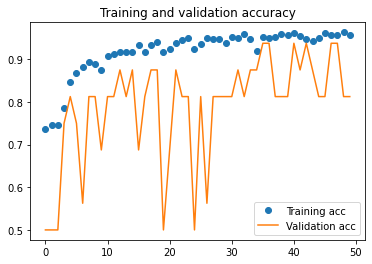

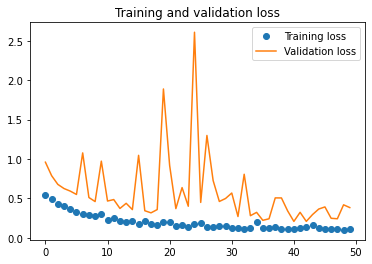

In [7]:
def plotResults(results):
    acc = results.history['acc']
    val_acc = results.history['val_acc']
    loss = results.history['loss']
    val_loss = results.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'o', label='Training acc')
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'o', label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
plotResults(result_baseline)

In [25]:
#create conv model

model_conv = models.Sequential()
model_conv.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(select_size, select_size, 1),))
#                            strides=2))
model_conv.add(layers.MaxPooling2D((2, 2)))

model_conv.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_conv.add(layers.MaxPooling2D((2, 2)))

model_conv.add(layers.Conv2D(128, (5, 5), activation='relu'))
model_conv.add(layers.MaxPooling2D((2, 2)))

model_conv.add(layers.Flatten())
model_conv.add(layers.Dense(256, activation='relu'))
model_conv.add(layers.Dense(128, activation='relu'))
model_conv.add(layers.Dense(1, activation='sigmoid'))

model_conv.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

results_conv = model_conv.fit(train_images,
                              train_y,
                                epochs=30,
                                batch_size=32,
                                validation_data=(val_images, val_y))

Epoch 1/30
47/47 [==============================] - 8s 166ms/step - loss: 0.6128 - acc: 0.7453 - val_loss: 0.7893 - val_acc: 0.5000
Epoch 2/30
47/47 [==============================] - 7s 152ms/step - loss: 0.5667 - acc: 0.7453 - val_loss: 0.8207 - val_acc: 0.5000
Epoch 3/30
47/47 [==============================] - 7s 155ms/step - loss: 0.5630 - acc: 0.7453 - val_loss: 0.8340 - val_acc: 0.5000
Epoch 4/30
47/47 [==============================] - 7s 149ms/step - loss: 0.5557 - acc: 0.7453 - val_loss: 0.8556 - val_acc: 0.5000
Epoch 5/30
47/47 [==============================] - 7s 143ms/step - loss: 0.5514 - acc: 0.7453 - val_loss: 0.8137 - val_acc: 0.5000
Epoch 6/30
47/47 [==============================] - 7s 152ms/step - loss: 0.5441 - acc: 0.7453 - val_loss: 0.8952 - val_acc: 0.5000
Epoch 7/30
47/47 [==============================] - 7s 141ms/step - loss: 0.5348 - acc: 0.7453 - val_loss: 0.7810 - val_acc: 0.5000
Epoch 8/30
47/47 [==============================] - 6s 138ms/step - loss: 0.

In [26]:

model_conv.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 128)       204928    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)             

10/10 [==============================] - 0s 6ms/step - loss: 0.4474 - acc: 0.7700


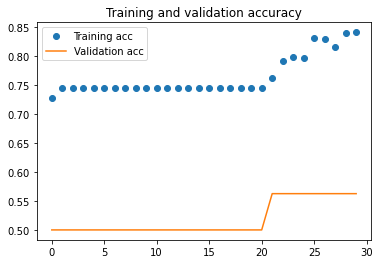

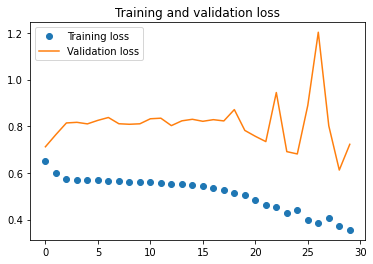

In [9]:
model_conv.evaluate(test_images, test_y)
plotResults(results_conv)

In [10]:
#setup data augmentation
train_gen_aug = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)

train_aug_generator = train_gen_aug.flow_from_directory(
        train_dir, 
        target_size=(select_size, select_size), batch_size=1500,
        color_mode='grayscale')

train_aug_images, train_aug_labels = next(train_generator)
train_aug_y = np.reshape(train_aug_labels[:,0], (-1,1))


Found 5216 images belonging to 2 classes.


In [11]:
#setup early stopping
early_stopping = [EarlyStopping(monitor='val_loss', patience=6), 
                  ModelCheckpoint(filepath='../models/conv_temp1.h5', monitor='val_loss', save_best_only=True)]

#need to fix the val set before this helps at all

In [15]:
model_conv_aug = models.Sequential()
model_conv_aug.add(layers.Conv2D(32, (3, 3), activation='relu',
                                 strides=2,
                        input_shape=(select_size, select_size, 1)))
model_conv_aug.add(layers.MaxPooling2D((2, 2)))

model_conv_aug.add(layers.Conv2D(64, (3, 3),
#                                 strides=2,
                                 activation='relu'))
model_conv_aug.add(layers.MaxPooling2D((2, 2)))

model_conv_aug.add(layers.Conv2D(128, (5, 5),
#                                 strides=2,
                                 activation='relu'))
model_conv_aug.add(layers.MaxPooling2D((2, 2)))

model_conv_aug.add(layers.Flatten())
model_conv_aug.add(layers.Dense(256, activation='relu'))
model_conv_aug.add(layers.Dense(128, activation='relu'))
model_conv_aug.add(layers.Dense(1, activation='sigmoid'))

model_conv_aug.compile(loss='binary_crossentropy',
                       optimizer="sgd",
                       metrics=['acc'])

results_conv_aug = model_conv_aug.fit(train_aug_images,
                                  train_aug_y,
                                  epochs=30,
                                  batch_size=32,
                                  validation_data=(val_images, val_y),
#                                     callbacks=early_stopping)
                                     )

Epoch 1/30
47/47 [==============================] - 1s 26ms/step - loss: 0.6559 - acc: 0.7227 - val_loss: 0.7143 - val_acc: 0.5000
Epoch 2/30
47/47 [==============================] - 1s 21ms/step - loss: 0.6077 - acc: 0.7247 - val_loss: 0.7629 - val_acc: 0.5000
Epoch 3/30
47/47 [==============================] - 1s 22ms/step - loss: 0.5917 - acc: 0.7247 - val_loss: 0.7952 - val_acc: 0.5000
Epoch 4/30
47/47 [==============================] - 1s 21ms/step - loss: 0.5892 - acc: 0.7247 - val_loss: 0.8045 - val_acc: 0.5000
Epoch 5/30
47/47 [==============================] - 1s 22ms/step - loss: 0.5875 - acc: 0.7247 - val_loss: 0.8042 - val_acc: 0.5000
Epoch 6/30
47/47 [==============================] - 1s 22ms/step - loss: 0.5862 - acc: 0.7247 - val_loss: 0.7898 - val_acc: 0.5000
Epoch 7/30
47/47 [==============================] - 1s 21ms/step - loss: 0.5848 - acc: 0.7247 - val_loss: 0.7900 - val_acc: 0.5000
Epoch 8/30
47/47 [==============================] - 1s 22ms/step - loss: 0.5836 - a

10/10 [==============================] - 0s 6ms/step - loss: 0.4287 - acc: 0.8000


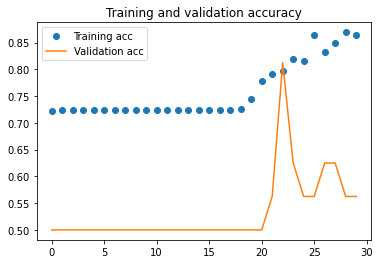

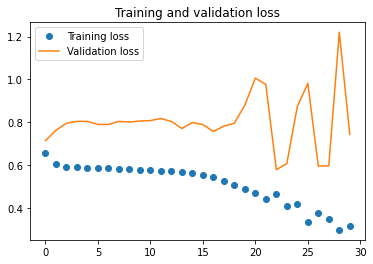

In [16]:
model_conv_aug.evaluate(test_images, test_y)
plotResults(results_conv_aug)

In [17]:
#setup feature extraction
#load images in color

test_generator_color = train_gen_aug.flow_from_directory(
        test_dir, 
        target_size=(select_size, select_size), batch_size = 300) 

val_generator_color = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_dir, 
        target_size=(select_size, select_size), batch_size = 16)

train_generator_color = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_dir, 
        target_size=(select_size, select_size), batch_size=1500)

train_images_color, train_labels_color = next(train_generator_color)
test_images_color, test_labels_color = next(test_generator_color)
val_images_color, val_labels_color = next(val_generator_color)

train_y_color = np.reshape(train_labels_color[:,0], (-1,1))
test_y_color = np.reshape(test_labels_color[:,0], (-1,1))
val_y_color = np.reshape(val_labels_color[:,0], (-1,1))




#load model

vgg = VGG19(weights='imagenet',
           include_top=False,
           input_shape=(select_size, select_size, 3))

vgg.trainable = False

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [18]:
model_transfer = models.Sequential()
model_transfer.add(vgg)

model_transfer.add(layers.Flatten())
model_transfer.add(layers.Dense(512, activation='relu'))
model_transfer.add(layers.Dense(256, activation='relu'))
model_transfer.add(layers.Dense(1, activation='sigmoid'))

model_transfer.compile(loss='binary_crossentropy',
                       optimizer="sgd",
                       metrics=['acc'])

for layer in model_transfer.layers:
    print(layer.name, layer.trainable)

results_transfer = model_transfer.fit(train_images_color,
                                  train_y_color,
                                  epochs=15,
                                  batch_size=32,
                                  validation_data=(val_images_color, val_y_color))

vgg19 False
flatten_3 True
dense_13 True
dense_14 True
dense_15 True
Epoch 1/15
47/47 [==============================] - 47s 992ms/step - loss: 0.4403 - acc: 0.7880 - val_loss: 0.4819 - val_acc: 0.7500
Epoch 2/15
47/47 [==============================] - 46s 973ms/step - loss: 0.3305 - acc: 0.8567 - val_loss: 0.5198 - val_acc: 0.6250
Epoch 3/15
47/47 [==============================] - 48s 1s/step - loss: 0.3002 - acc: 0.8727 - val_loss: 0.7406 - val_acc: 0.5625
Epoch 4/15
47/47 [==============================] - 45s 966ms/step - loss: 0.2676 - acc: 0.8780 - val_loss: 0.3199 - val_acc: 0.8750
Epoch 5/15
47/47 [==============================] - 45s 968ms/step - loss: 0.2561 - acc: 0.8853 - val_loss: 0.5257 - val_acc: 0.6250
Epoch 6/15
47/47 [==============================] - 45s 955ms/step - loss: 0.2433 - acc: 0.8973 - val_loss: 0.3281 - val_acc: 0.8125
Epoch 7/15
47/47 [==============================] - 48s 1s/step - loss: 0.2362 - acc: 0.9013 - val_loss: 0.3059 - val_acc: 0.8750
Epoch 

10/10 [==============================] - 8s 817ms/step - loss: 0.8411 - acc: 0.6833


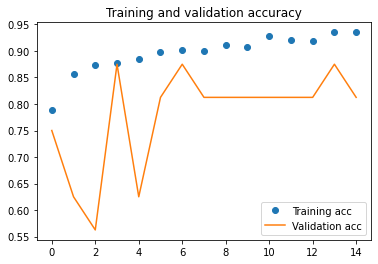

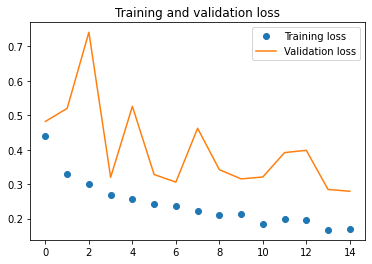

In [19]:
model_transfer.evaluate(test_images_color, test_y_color)
plotResults(results_transfer)